In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale

In [3]:
df = pd.read_excel('compactiv.xlsx')

In [4]:
df.head()

lread  lwrite  scall  sread  swrite  fork  exec    rchar    wchar  pgout  \
0      1       0   2147     79      68   0.2   0.2  40671.0  53995.0    0.0   
1      0       0    170     18      21   0.2   0.2    448.0   8385.0    0.0   
2     15       3   2162    159     119   2.0   2.4      NaN  31950.0    0.0   
3      0       0    160     12      16   0.2   0.2      NaN   8670.0    0.0   
4      5       1    330     39      38   0.4   0.4      NaN  12185.0    0.0   

   ...  pgscan  atch  pgin  ppgin    pflt    vflt         runqsz  freemem  \
0  ...     0.0   0.0   1.6    2.6   16.00   26.40      CPU_Bound     4670   
1  ...     0.0   0.0   0.0    0.0   15.63   16.83  Not_CPU_Bound     7278   
2  ...     0.0   1.2   6.0    9.4  150.20  220.20  Not_CPU_Bound      702   
3  ...     0.0   0.0   0.2    0.2   15.60   16.80  Not_CPU_Bound     7248   
4  ...     0.0   0.0   1.0    1.2   37.80   47.60  Not_CPU_Bound      633   

  freeswap  usr  
0  1730946   95  
1  1869002   97  
2  1021237   87  
3  1863704   98  
4  1760253   90  

[5 rows x 22 columns]

In [5]:
df

lread  lwrite  scall  sread  swrite  fork  exec     rchar    wchar  \
0         1       0   2147     79      68   0.2  0.20   40671.0  53995.0   
1         0       0    170     18      21   0.2  0.20     448.0   8385.0   
2        15       3   2162    159     119   2.0  2.40       NaN  31950.0   
3         0       0    160     12      16   0.2  0.20       NaN   8670.0   
4         5       1    330     39      38   0.4  0.40       NaN  12185.0   
...     ...     ...    ...    ...     ...   ...   ...       ...      ...   
8187     16      12   3009    360     244   1.6  5.81  405250.0  85282.0   
8188      4       0   1596    170     146   2.4  1.80   89489.0  41764.0   
8189     16       5   3116    289     190   0.6  0.60  325948.0  52640.0   
8190     32      45   5180    254     179   1.2  1.20   62571.0  29505.0   
8191      2       0    985     55      46   1.6  4.80  111111.0  22256.0   

      pgout  ...  pgscan  atch   pgin  ppgin    pflt    vflt         runqsz  \
0      0.00  ...    0.00   0.0   1.60   2.60   16.00   26.40      CPU_Bound   
1      0.00  ...    0.00   0.0   0.00   0.00   15.63   16.83  Not_CPU_Bound   
2      0.00  ...    0.00   1.2   6.00   9.40  150.20  220.20  Not_CPU_Bound   
3      0.00  ...    0.00   0.0   0.20   0.20   15.60   16.80  Not_CPU_Bound   
4      0.00  ...    0.00   0.0   1.00   1.20   37.80   47.60  Not_CPU_Bound   
...     ...  ...     ...   ...    ...    ...     ...     ...            ...   
8187   8.02  ...   55.11   0.6  35.87  47.90  139.28  270.74      CPU_Bound   
8188   3.80  ...    0.20   0.8   3.80   4.40  122.40  212.60  Not_CPU_Bound   
8189   0.40  ...    0.00   0.4  28.40  45.20   60.20  219.80  Not_CPU_Bound   
8190   1.40  ...   18.04   0.4  23.05  24.25   93.19  202.81      CPU_Bound   
8191   0.00  ...    0.00   0.2   3.40   6.20   91.80  110.00      CPU_Bound   

      freemem freeswap  usr  
0        4670  1730946   95  
1        7278  1869002   97  
2         702  1021237   87  
3        7248  1863704   98  
4         633  1760253   90  
...       ...      ...  ...  
8187      387   986647   80  
8188      263  1055742   90  
8189      400   969106   87  
8190      141  1022458   83  
8191      659  1756514   94  

[8192 rows x 22 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8088 non-null   float64
 8   wchar     8177 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  runqsz    8192 non-null   object 
 19  freemem   8192 non-null   int64  
 20  freeswap  8192 non-null   int6

In [7]:
print("Data Shape:", df.shape)

Data Shape: (8192, 22)


In [8]:
print("Data Types:", df.dtypes)

Data Types: lread         int64
lwrite        int64
scall         int64
sread         int64
swrite        int64
fork        float64
exec        float64
rchar       float64
wchar       float64
pgout       float64
ppgout      float64
pgfree      float64
pgscan      float64
atch        float64
pgin        float64
ppgin       float64
pflt        float64
vflt        float64
runqsz       object
freemem       int64
freeswap      int64
usr           int64
dtype: object


In [9]:
df.describe().T

count          mean            std     min        25%        50%  \
lread     8192.0  1.955969e+01      53.353799     0.0        2.0        7.0   
lwrite    8192.0  1.310620e+01      29.891726     0.0        0.0        1.0   
scall     8192.0  2.306318e+03    1633.617322   109.0     1012.0     2051.5   
sread     8192.0  2.104800e+02     198.980146     6.0       86.0      166.0   
swrite    8192.0  1.500582e+02     160.478980     7.0       63.0      117.0   
fork      8192.0  1.884554e+00       2.479493     0.0        0.4        0.8   
exec      8192.0  2.791998e+00       5.212456     0.0        0.2        1.2   
rchar     8088.0  1.973857e+05  239837.493526   278.0    34091.5   125473.5   
wchar     8177.0  9.590299e+04  140841.707911  1498.0    22916.0    46619.0   
pgout     8192.0  2.285317e+00       5.307038     0.0        0.0        0.0   
ppgout    8192.0  5.977229e+00      15.214590     0.0        0.0        0.0   
pgfree    8192.0  1.191971e+01      32.363520     0.0        0.0        0.0   
pgscan    8192.0  2.152685e+01      71.141340     0.0        0.0        0.0   
atch      8192.0  1.127505e+00       5.708347     0.0        0.0        0.0   
pgin      8192.0  8.277960e+00      13.874978     0.0        0.6        2.8   
ppgin     8192.0  1.238859e+01      22.281318     0.0        0.6        3.8   
pflt      8192.0  1.097938e+02     114.419221     0.0       25.0       63.8   
vflt      8192.0  1.853158e+02     191.000603     0.2       45.4      120.4   
freemem   8192.0  1.763456e+03    2482.104511    55.0      231.0      579.0   
freeswap  8192.0  1.328126e+06  422019.426957     2.0  1042623.5  1289289.5   
usr       8192.0  8.396887e+01      18.401905     0.0       81.0       89.0   

                  75%         max  
lread          20.000     1845.00  
lwrite         10.000      575.00  
scall        3317.250    12493.00  
sread         279.000     5318.00  
swrite        185.000     5456.00  
fork            2.200       20.12  
exec            2.800       59.56  
rchar      267828.750  2526649.00  
wchar      106101.000  1801623.00  
pgout           2.400       81.44  
ppgout          4.200      184.20  
pgfree          5.000      523.00  
pgscan          0.000     1237.00  
atch            0.600      211.58  
pgin            9.765      141.20  
ppgin          13.800      292.61  
pflt          159.600      899.80  
vflt          251.800     1365.00  
freemem      2002.250    12027.00  
freeswap  1730379.500  2243187.00  
usr            94.000       99.00

In [10]:
(df==0).sum()

lread        675
lwrite      2684
scall          0
sread          0
swrite         0
fork          21
exec          21
rchar          0
wchar          0
pgout       4878
ppgout      4878
pgfree      4869
pgscan      6448
atch        4575
pgin        1220
ppgin       1220
pflt           3
vflt           0
runqsz         0
freemem        0
freeswap       0
usr          283
dtype: int64

In [12]:
print('cols')
print(df[df== 0].count(axis=0)/len(df.index))

cols
lread       0.082397
lwrite      0.327637
scall       0.000000
sread       0.000000
swrite      0.000000
fork        0.002563
exec        0.002563
rchar       0.000000
wchar       0.000000
pgout       0.595459
ppgout      0.595459
pgfree      0.594360
pgscan      0.787109
atch        0.558472
pgin        0.148926
ppgin       0.148926
pflt        0.000366
vflt        0.000000
runqsz      0.000000
freemem     0.000000
freeswap    0.000000
usr         0.034546
dtype: float64


C:\Users\dell\AppData\Local\Temp\ipykernel_19728\261993289.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax, layout=(3,7), alpha=0.5, label='x');


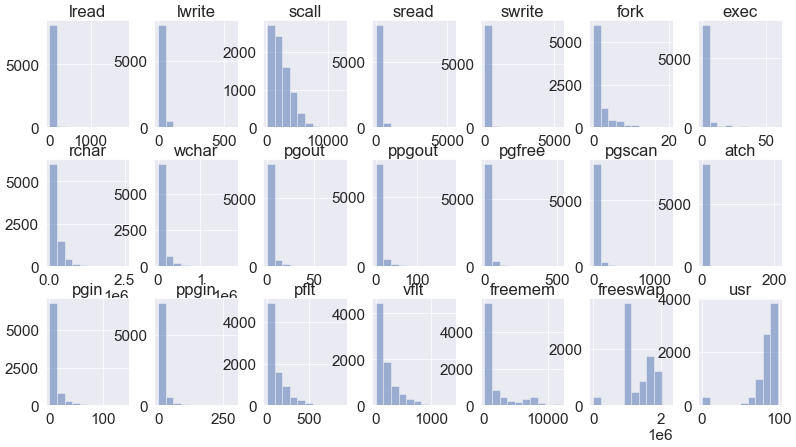

In [96]:
fig, ax = plt.subplots(figsize=(19,10), dpi=50)
df.hist(ax=ax, layout=(3,7), alpha=0.5, label='x');


In [13]:
data_new=df.drop(['runqsz'],axis=1)

lread


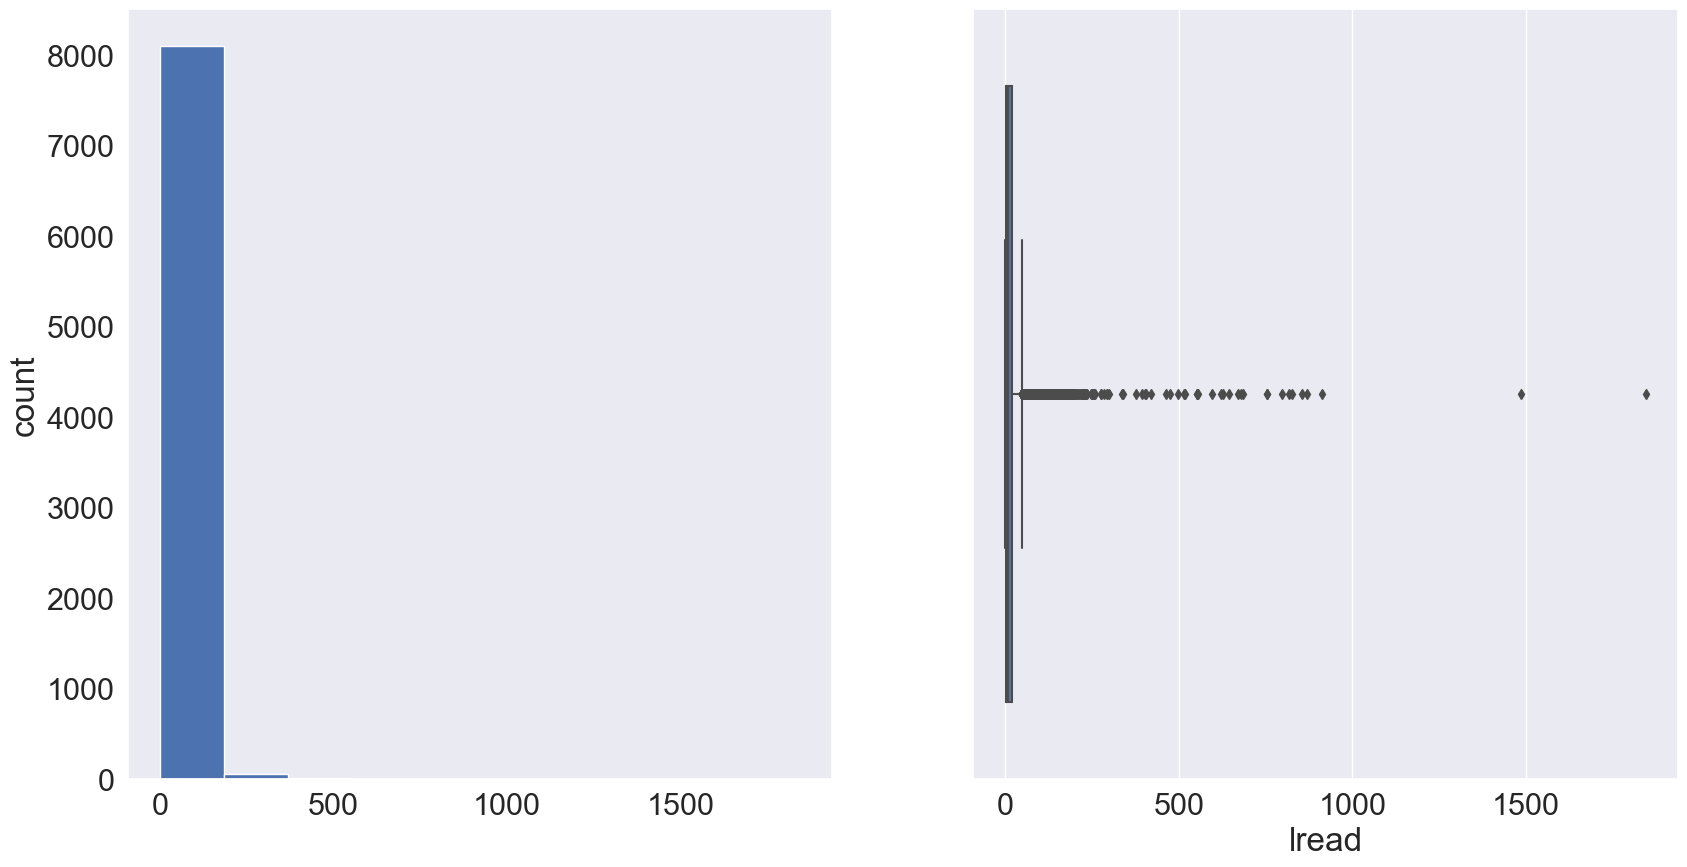

lwrite


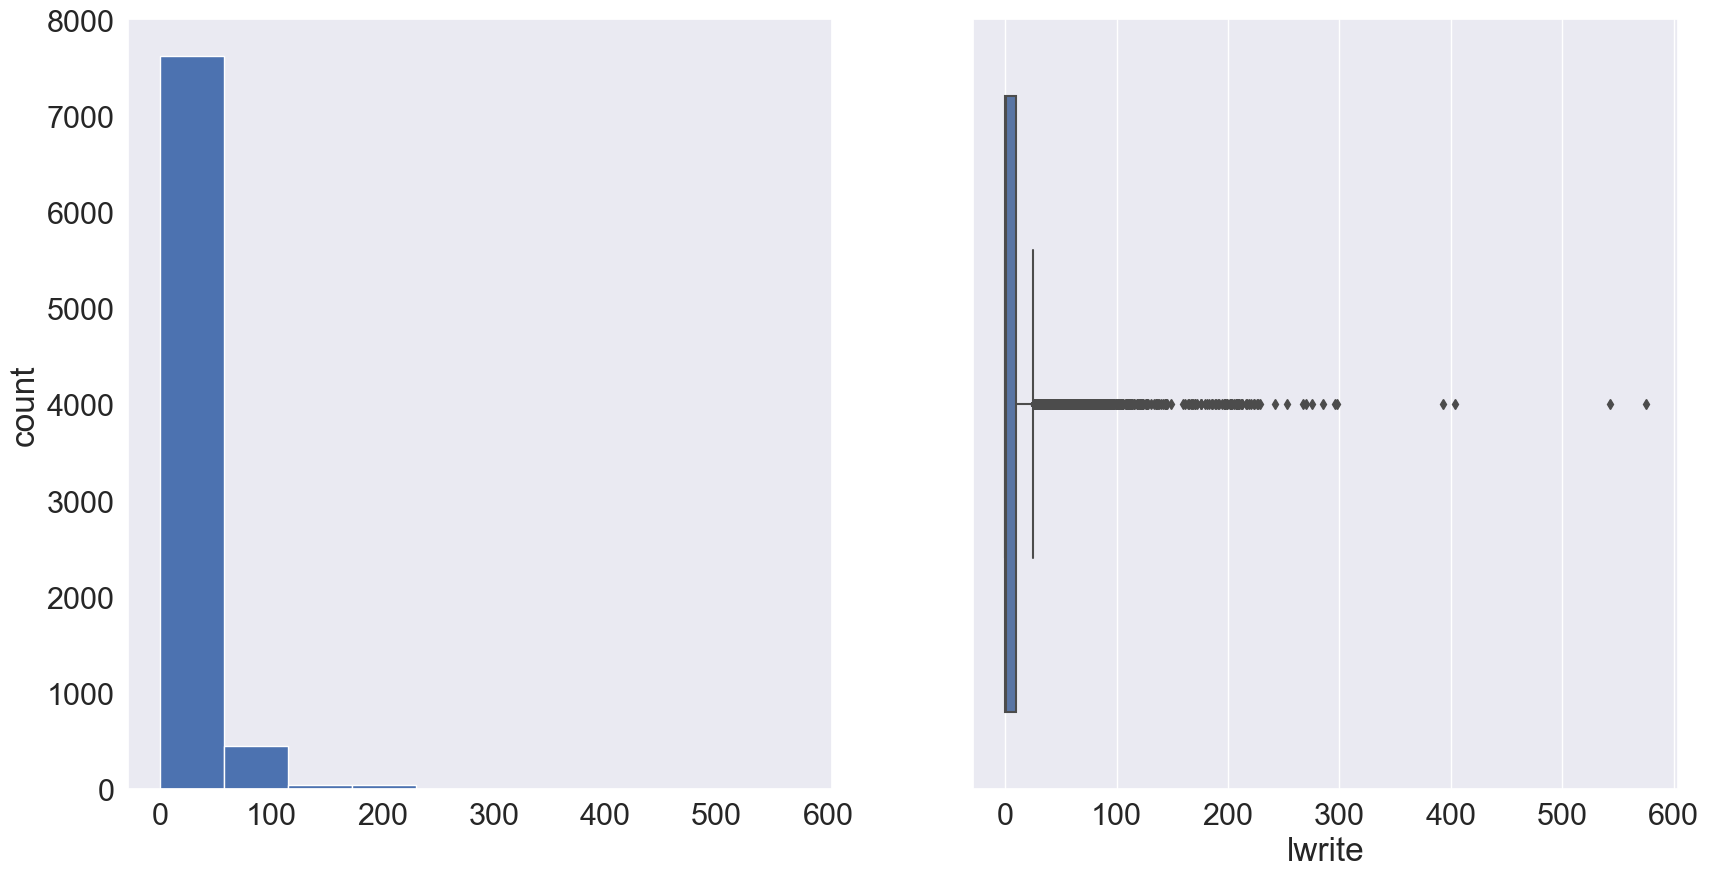

scall


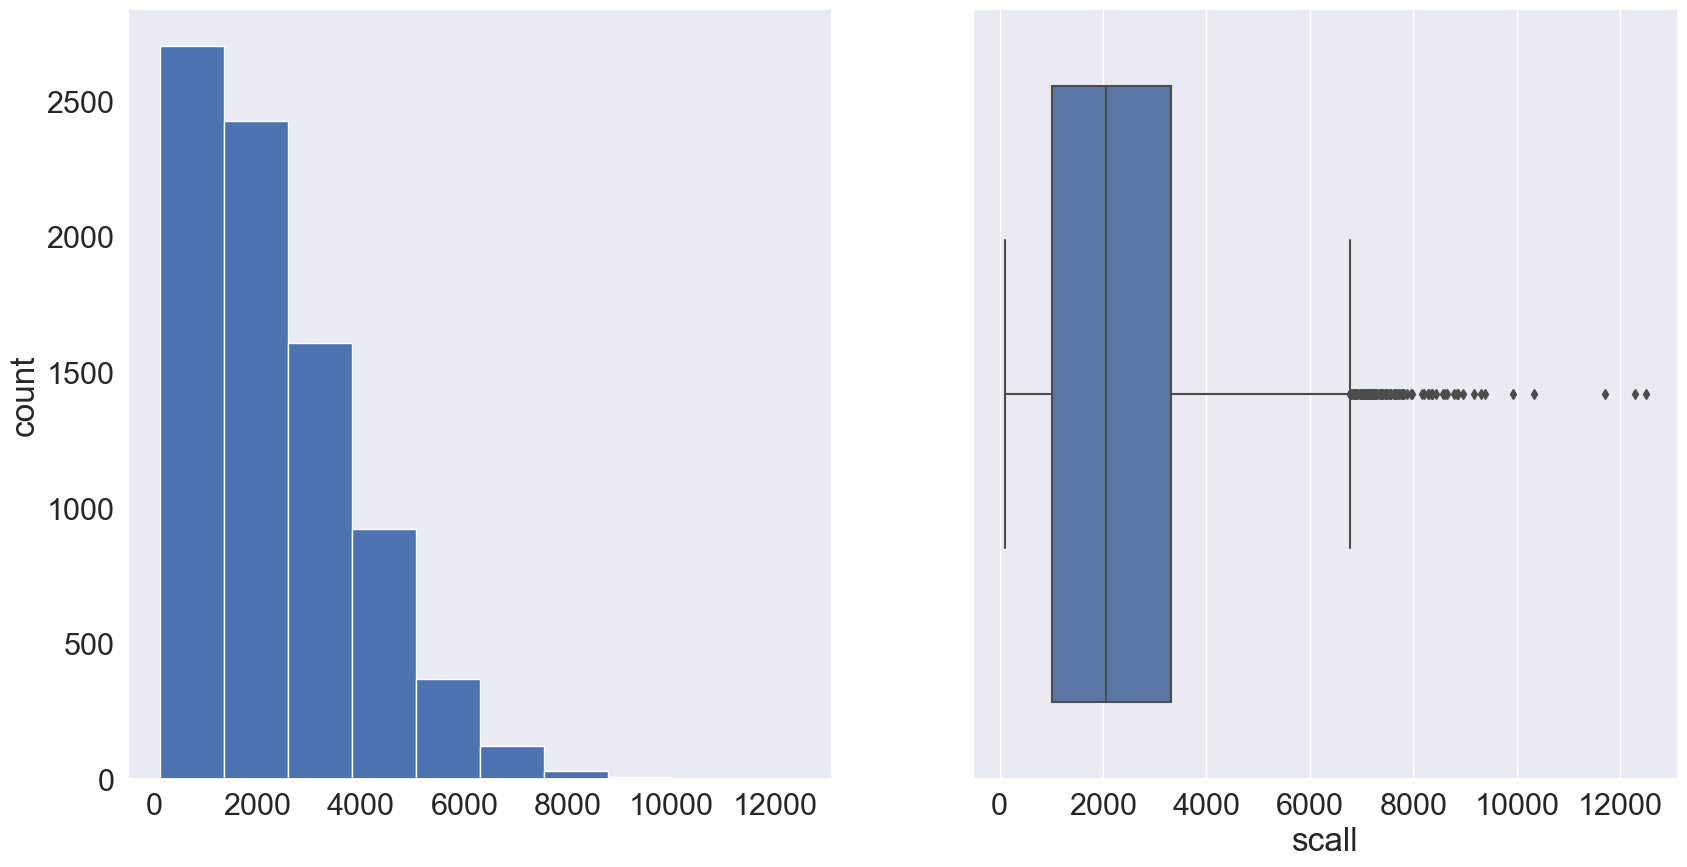

sread


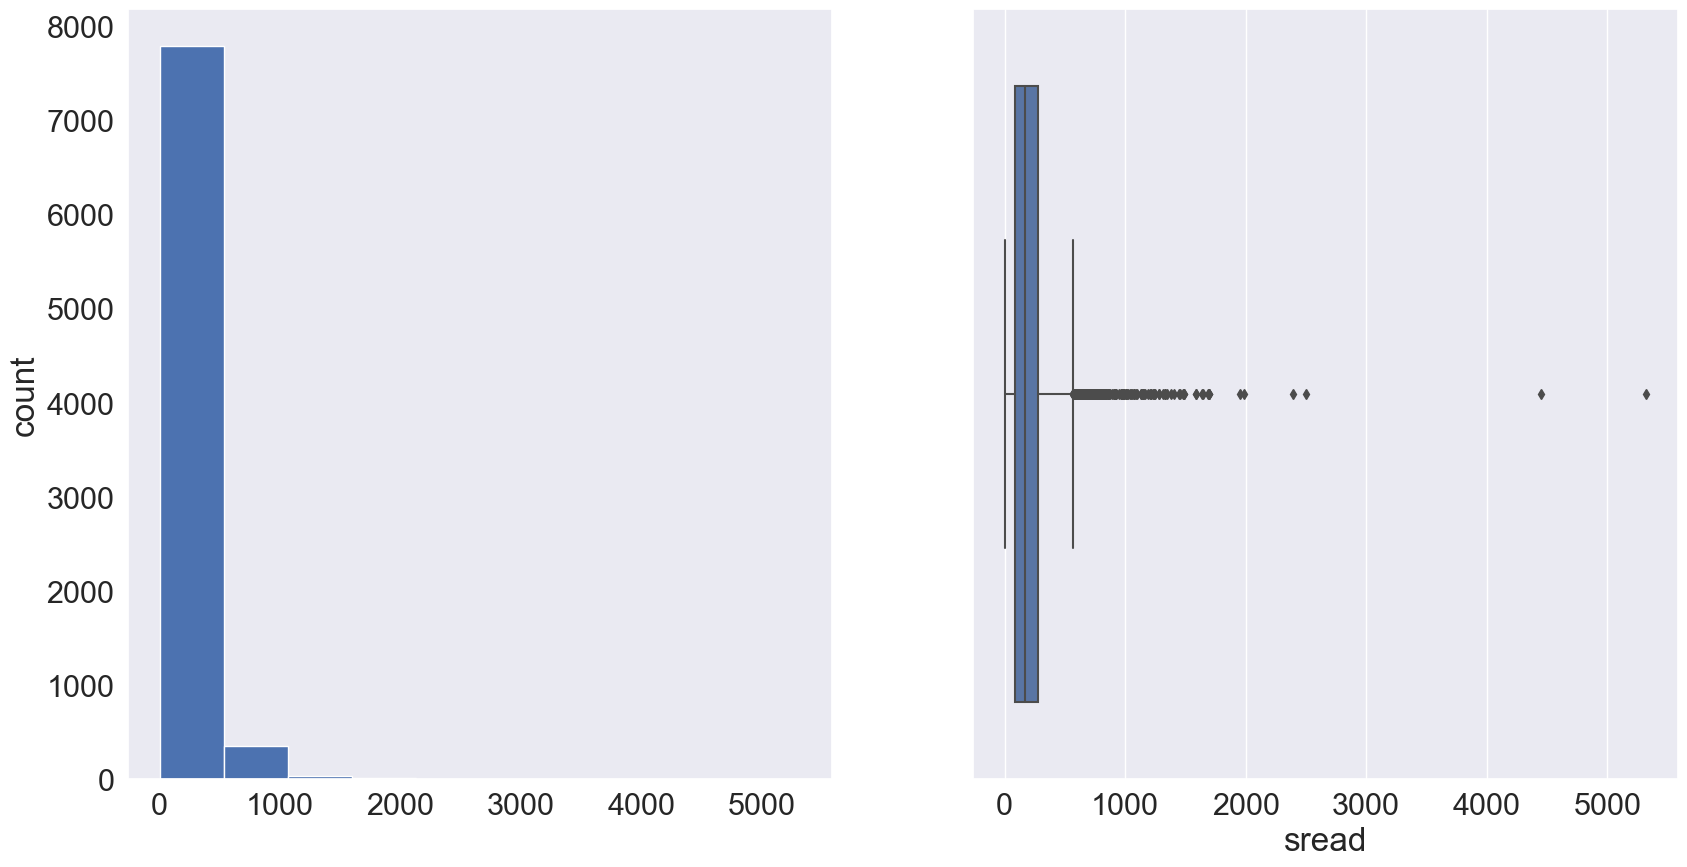

swrite


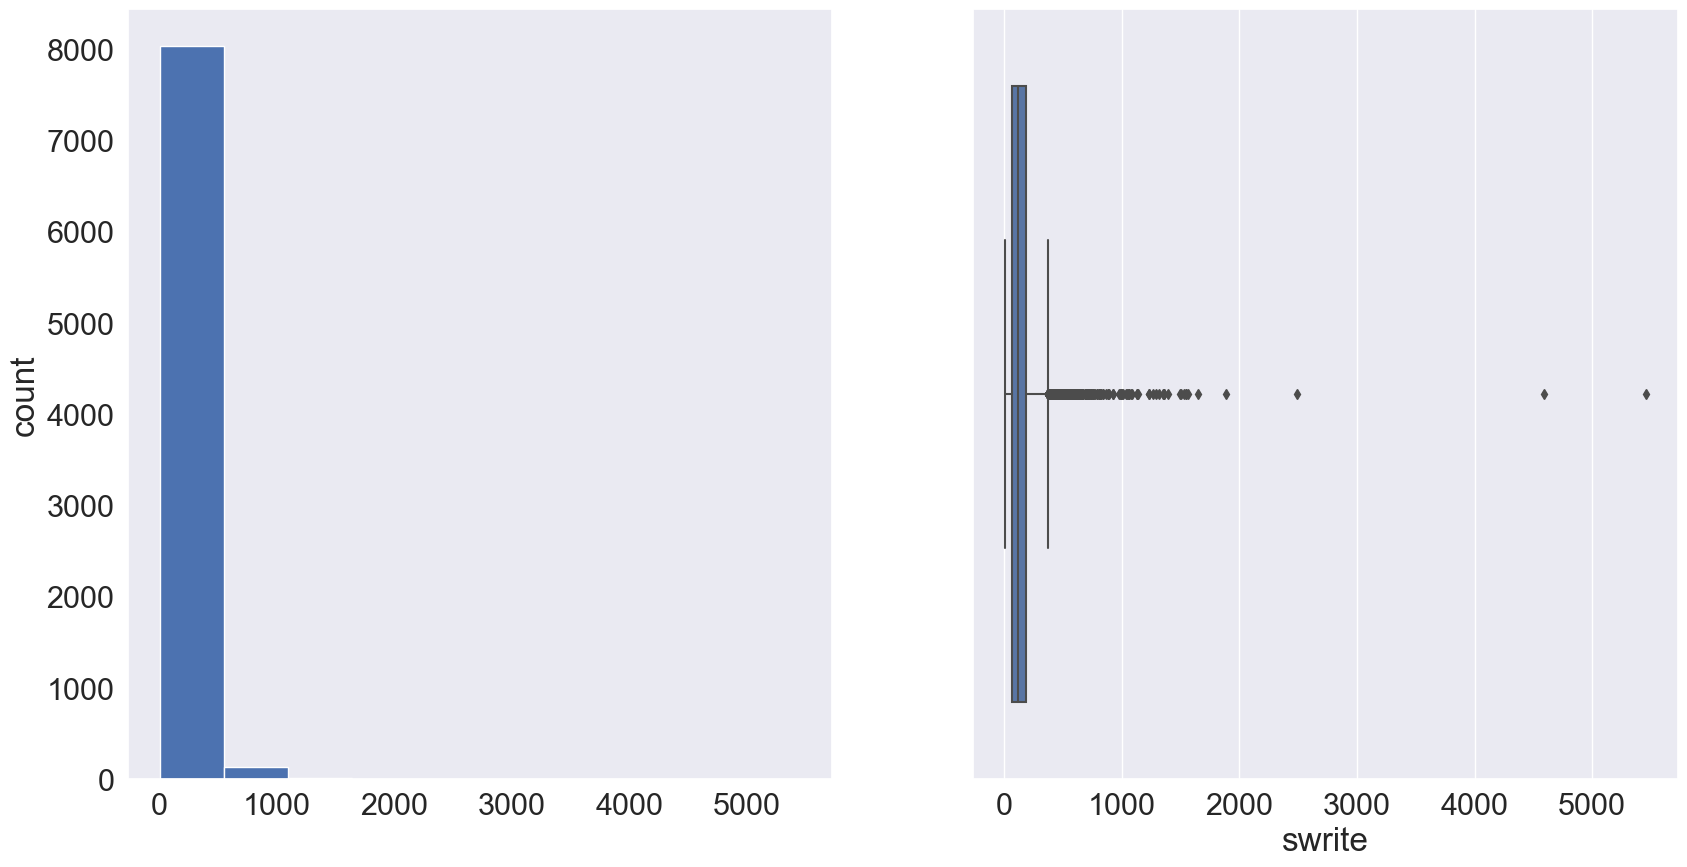

fork


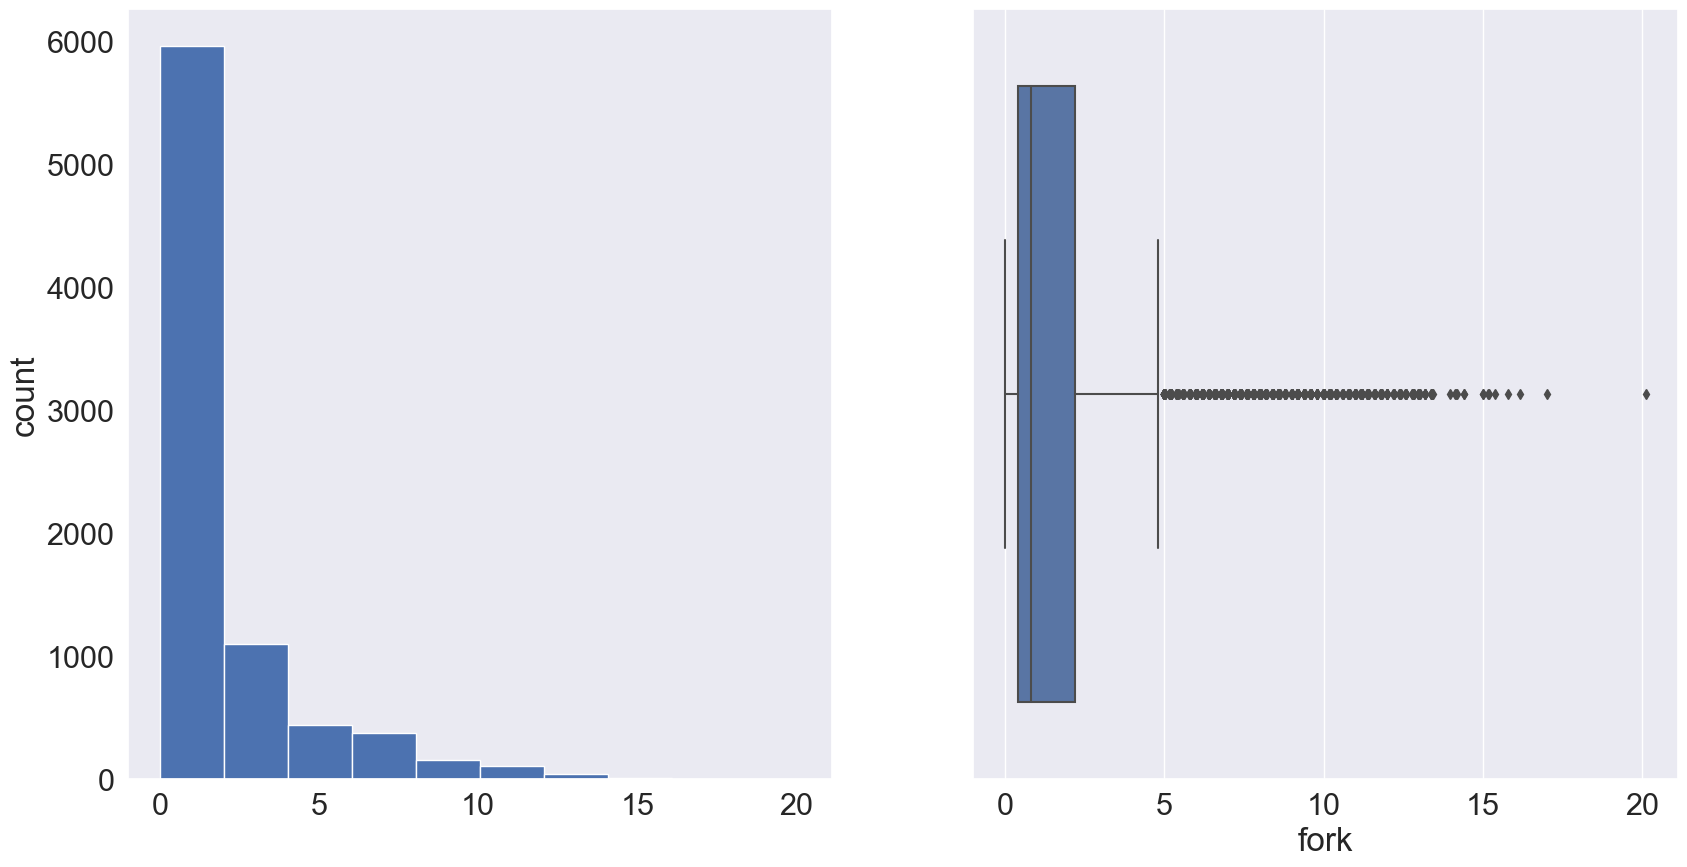

exec


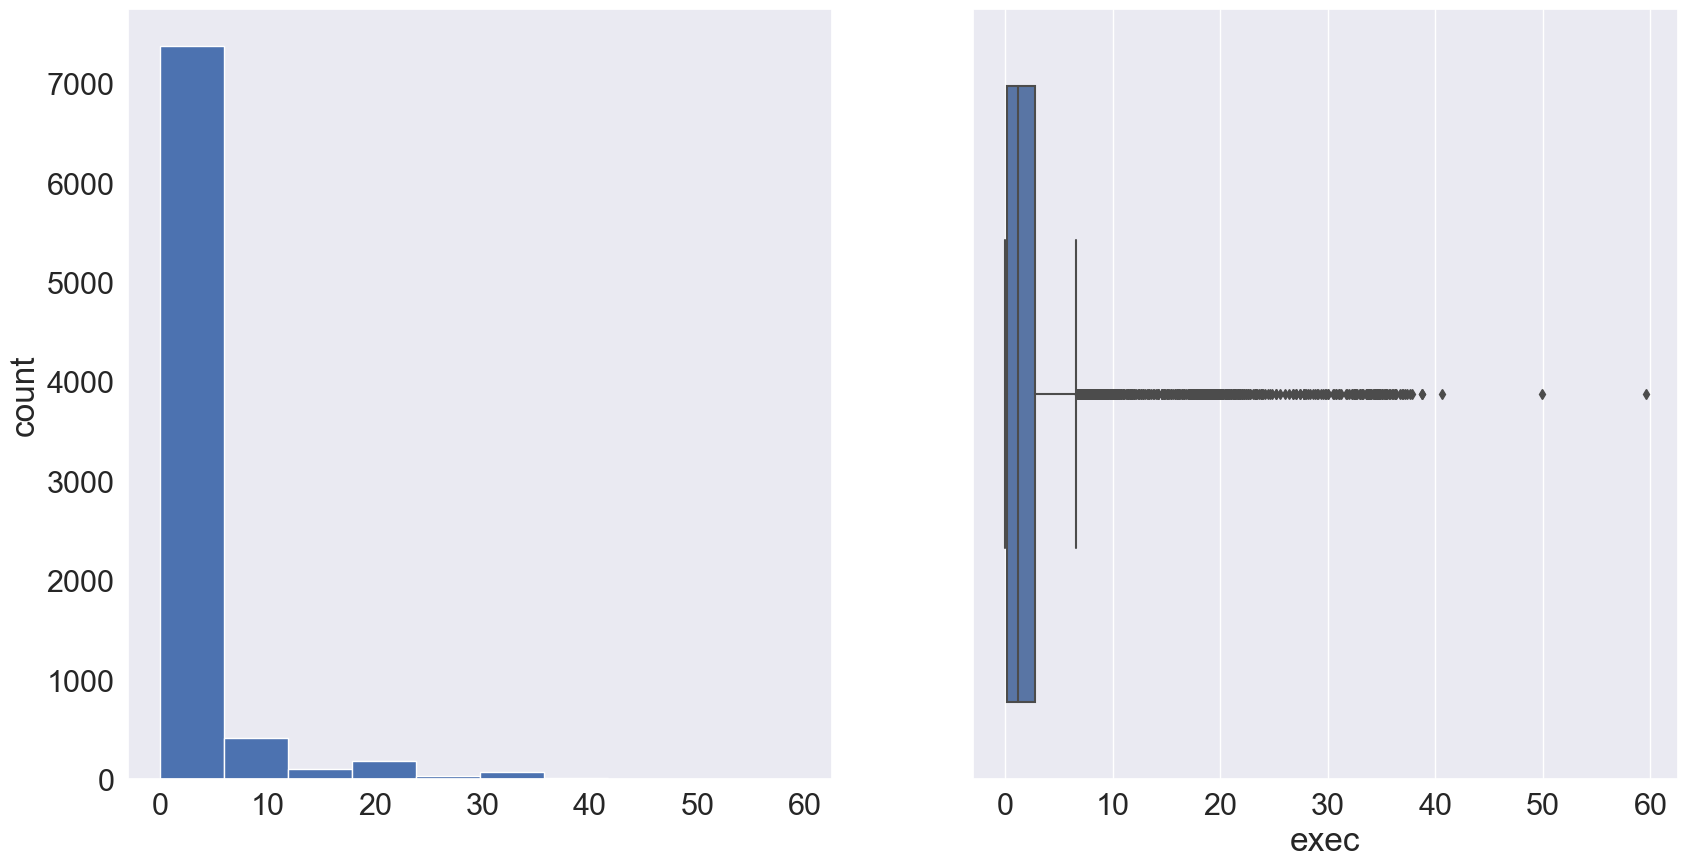

rchar


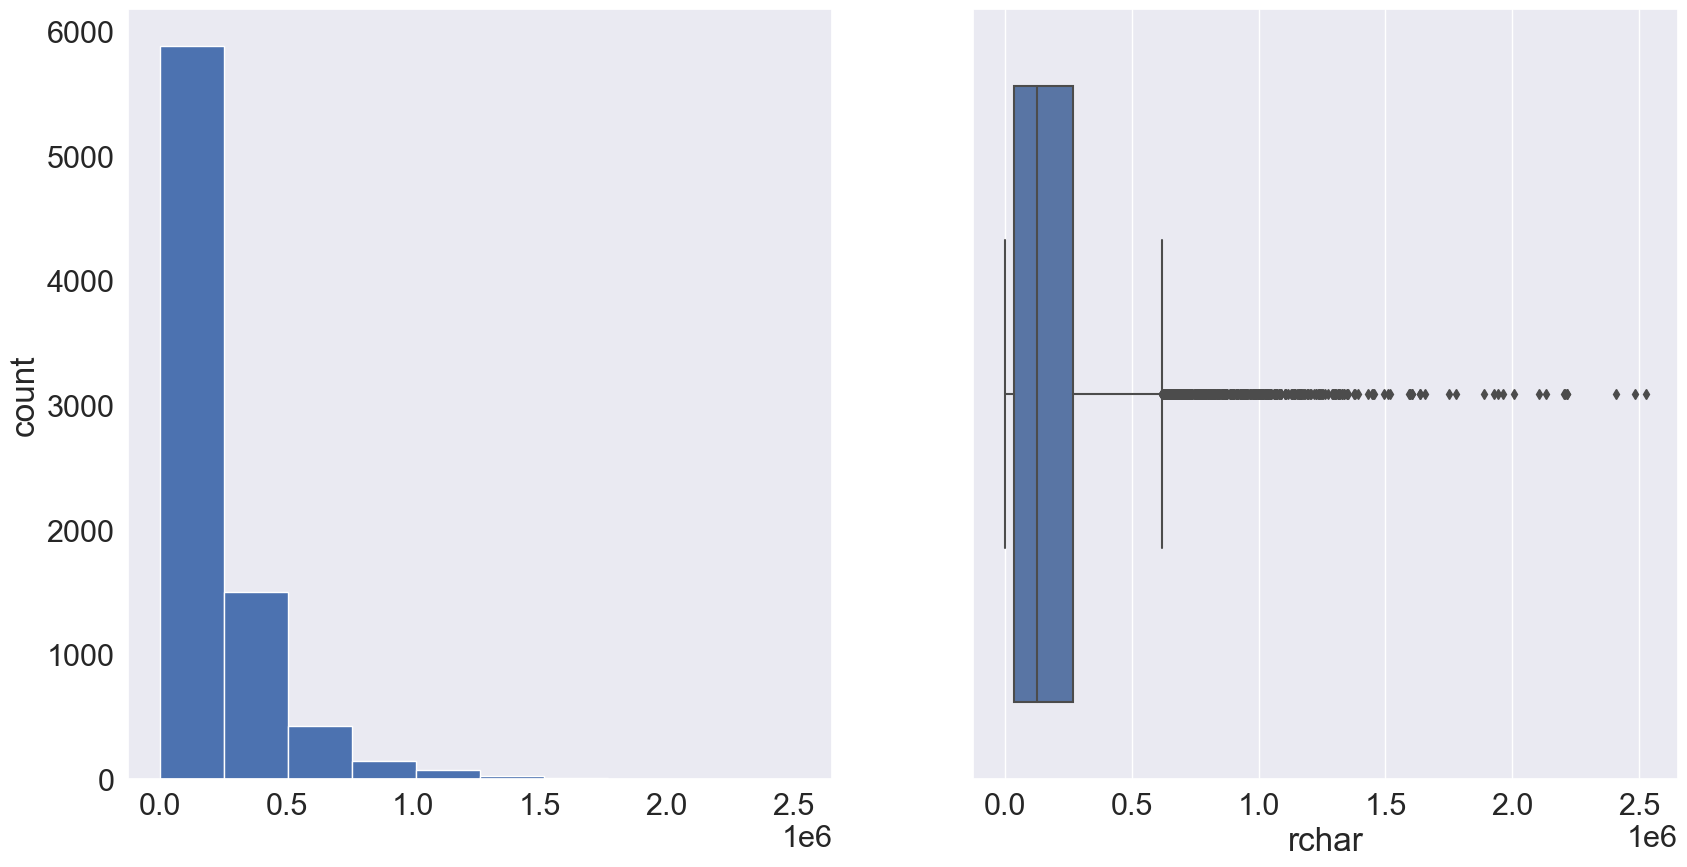

wchar


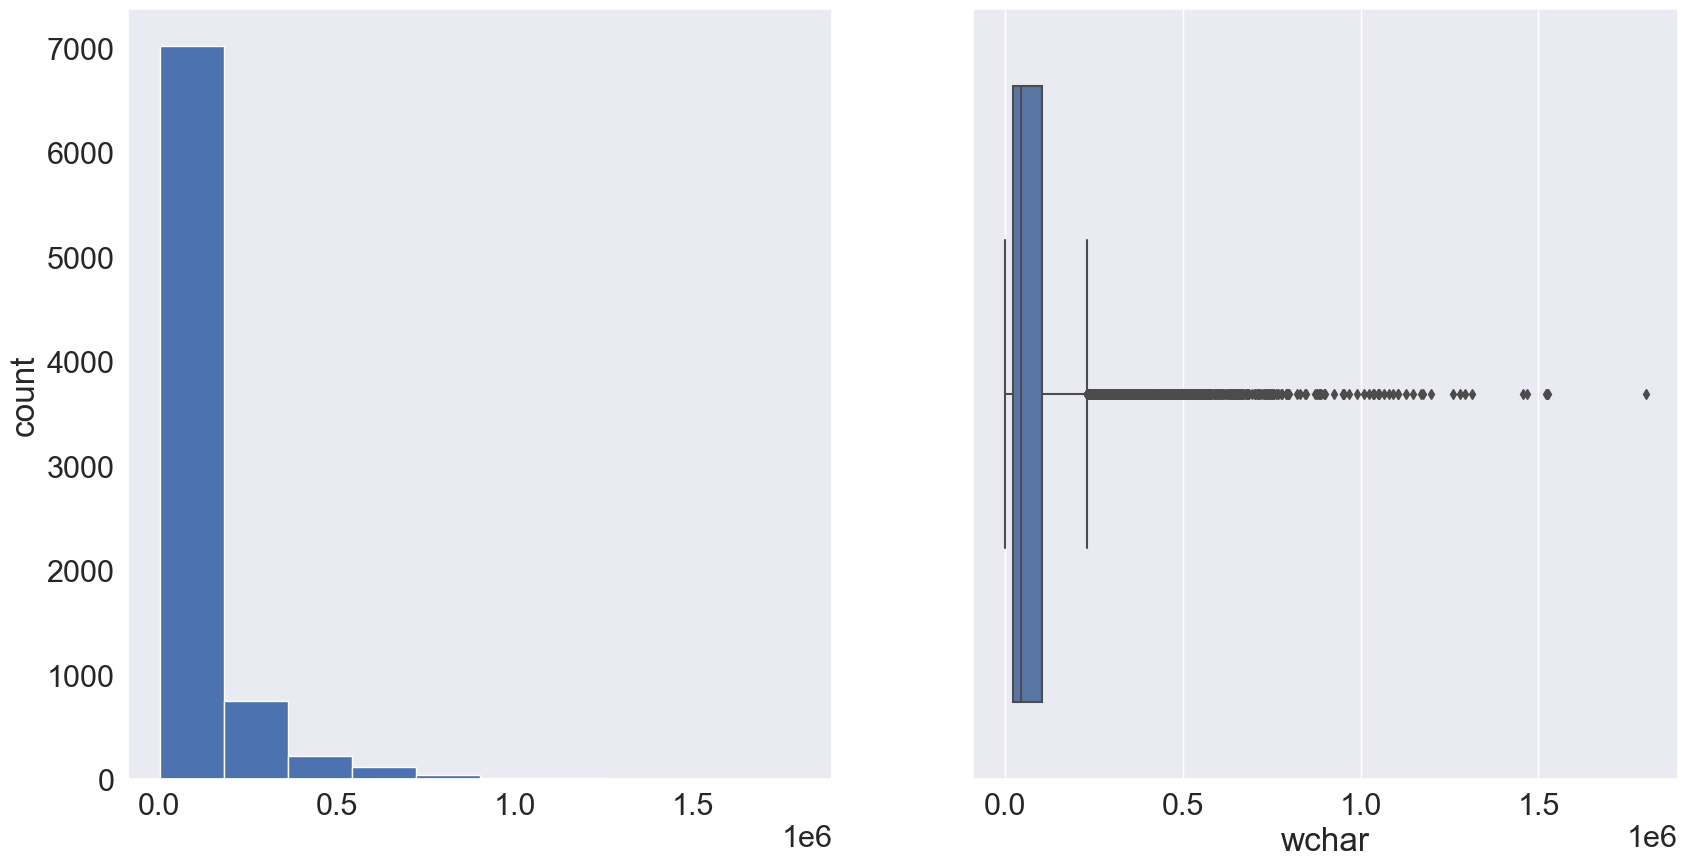

pgout


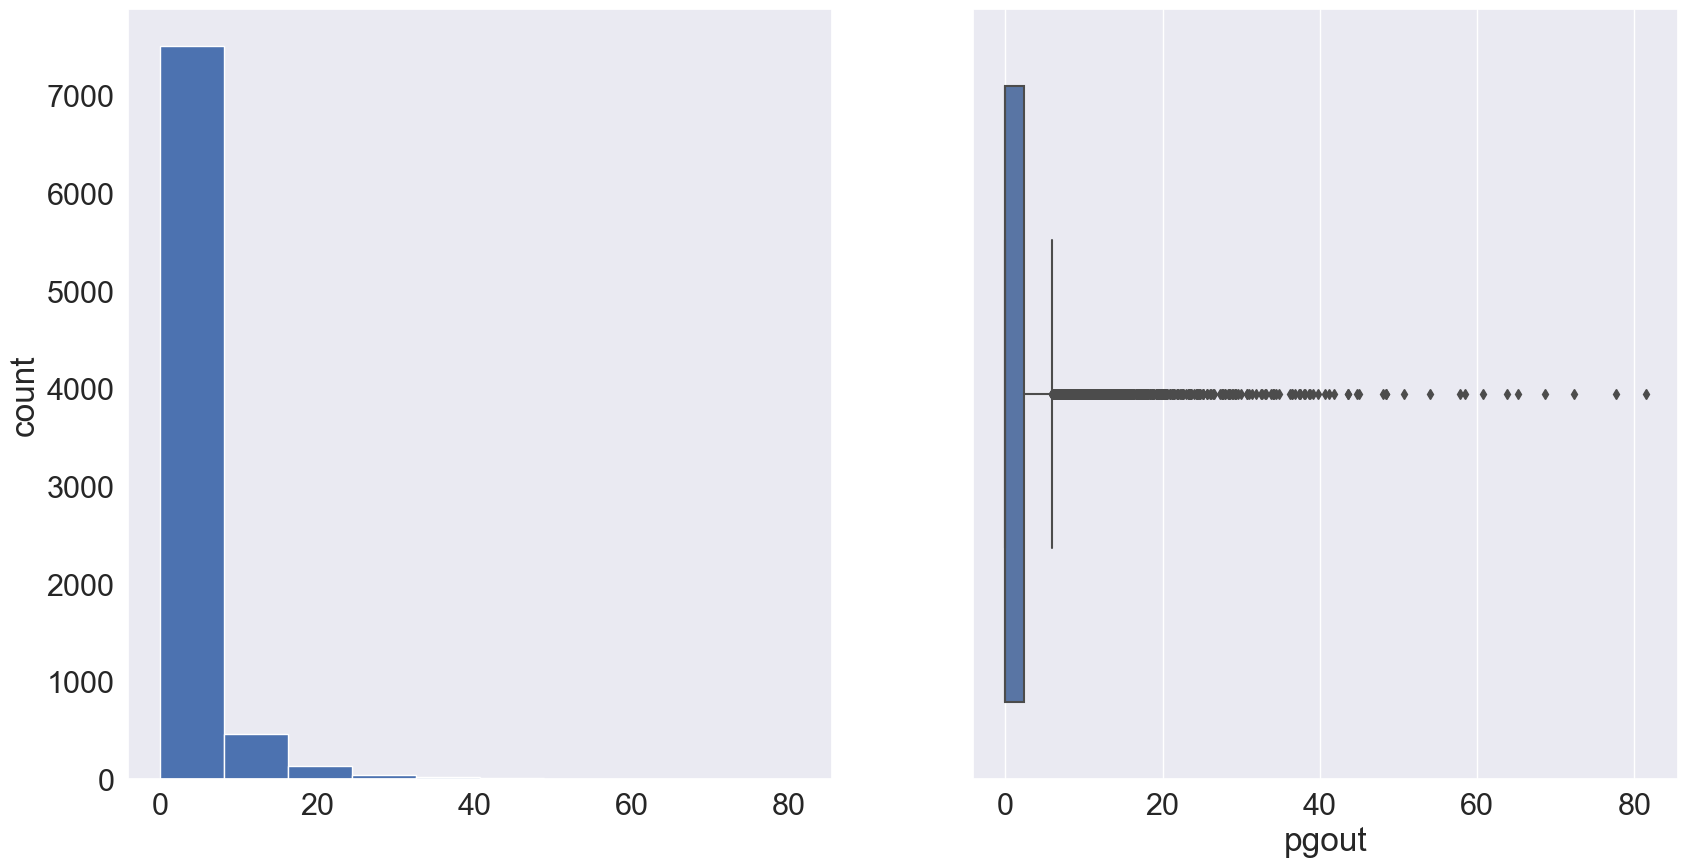

ppgout


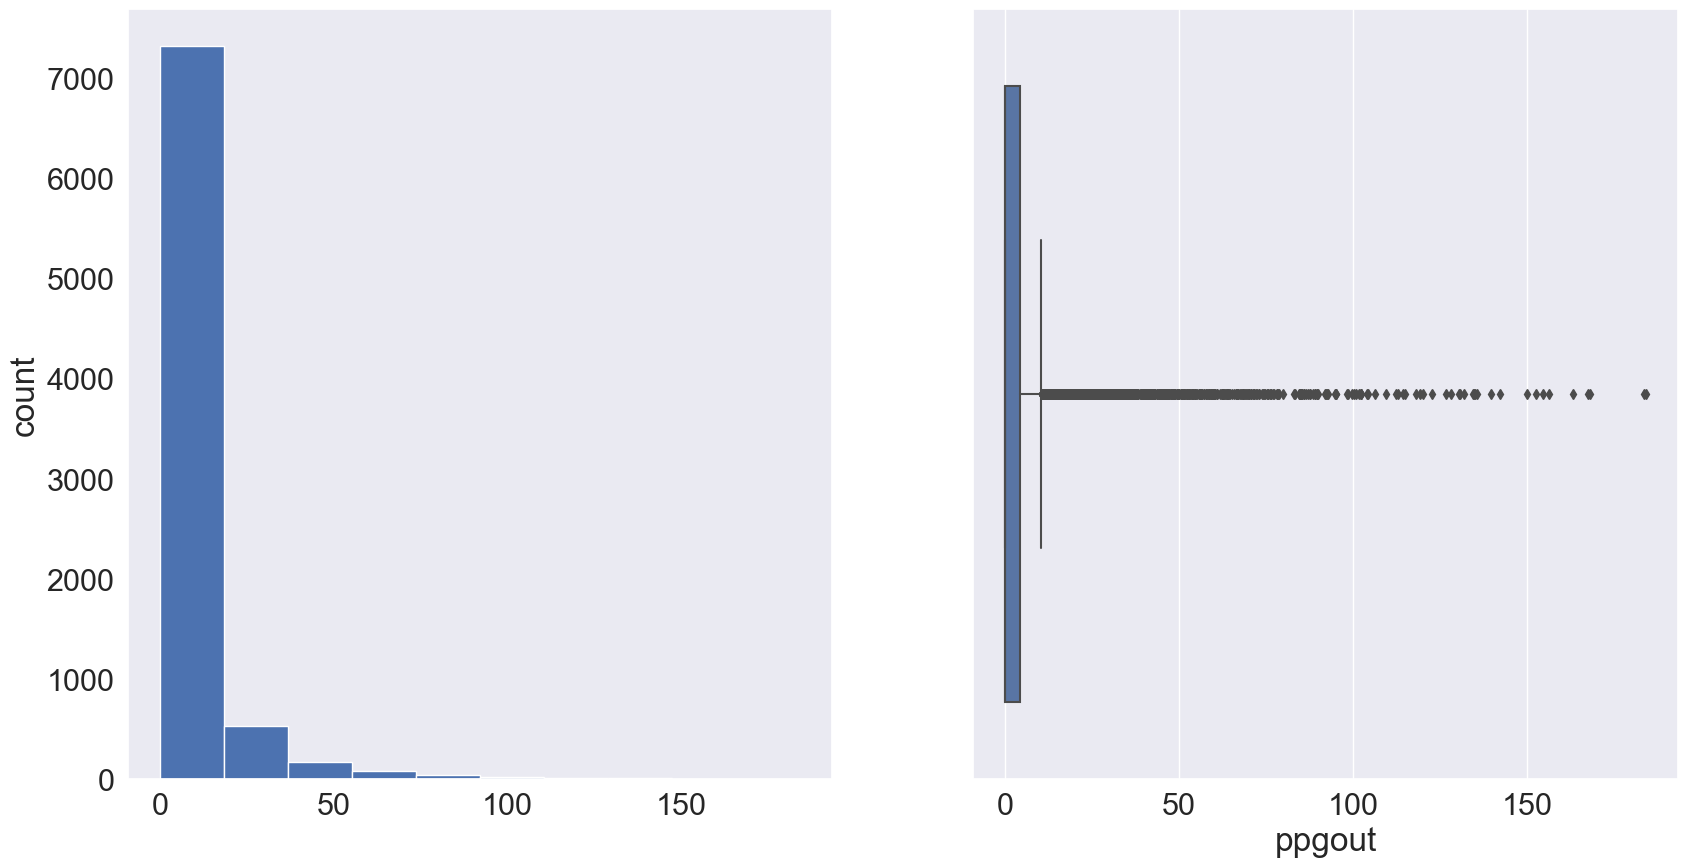

pgfree


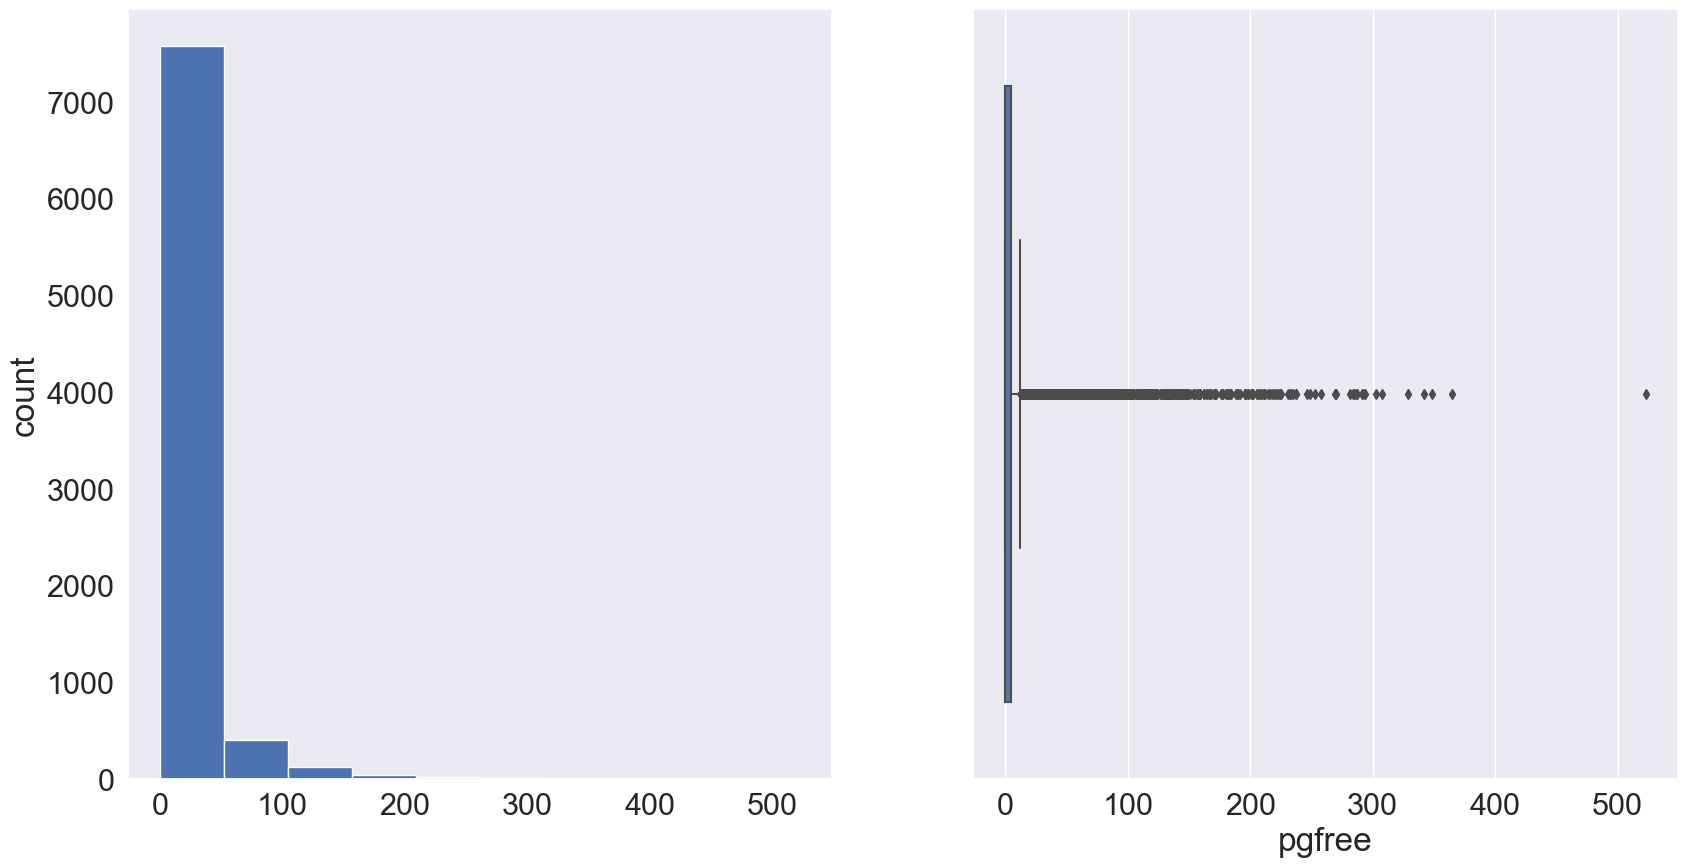

pgscan


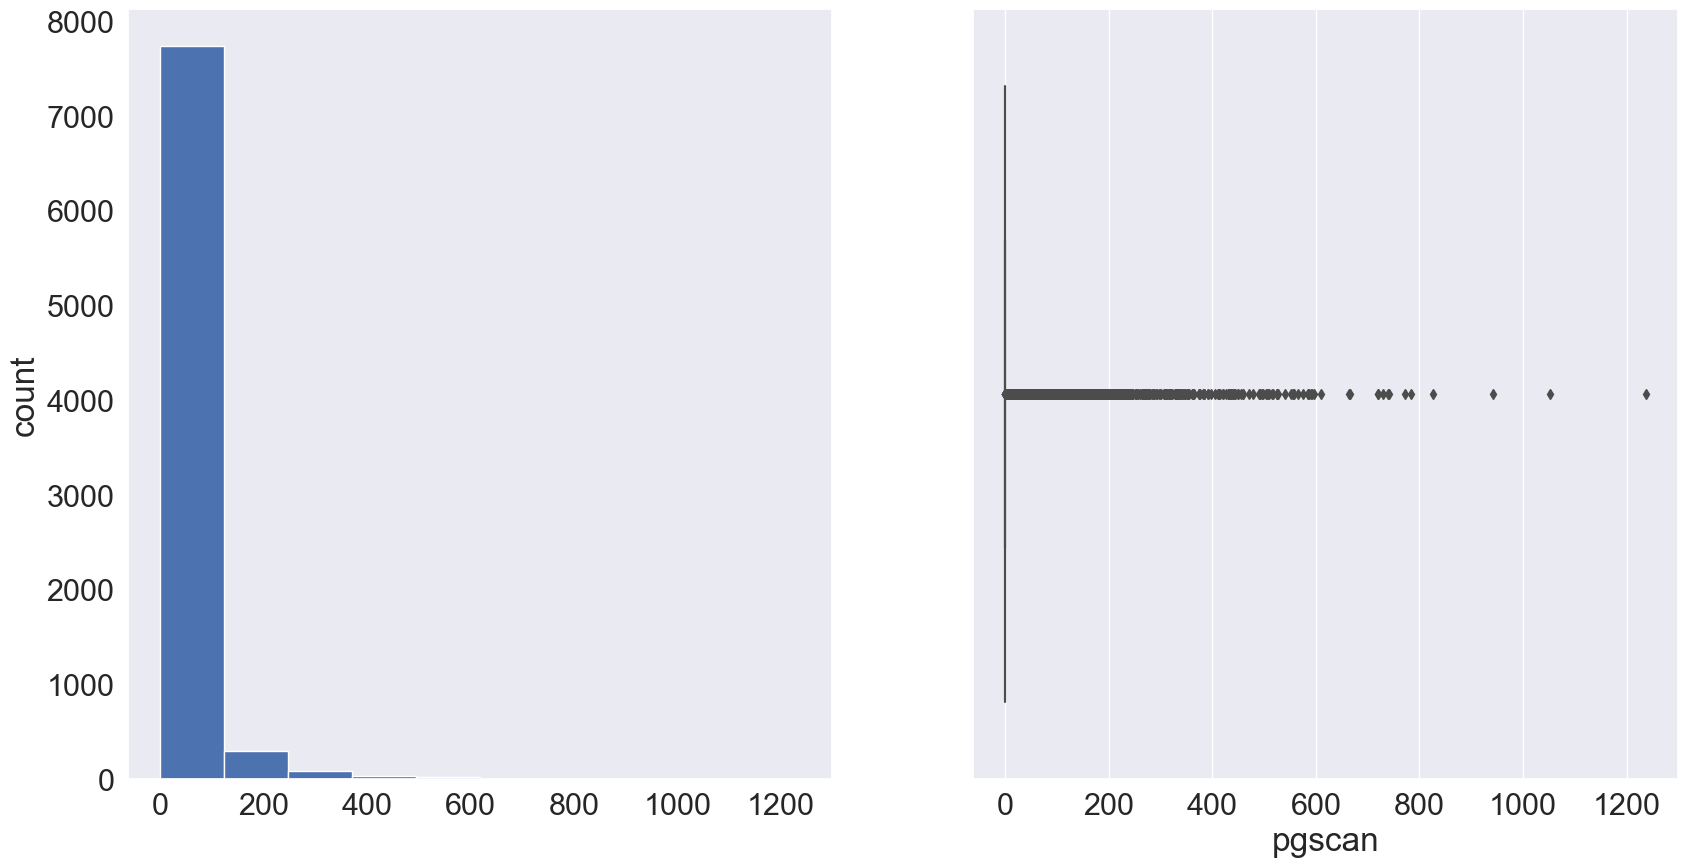

atch


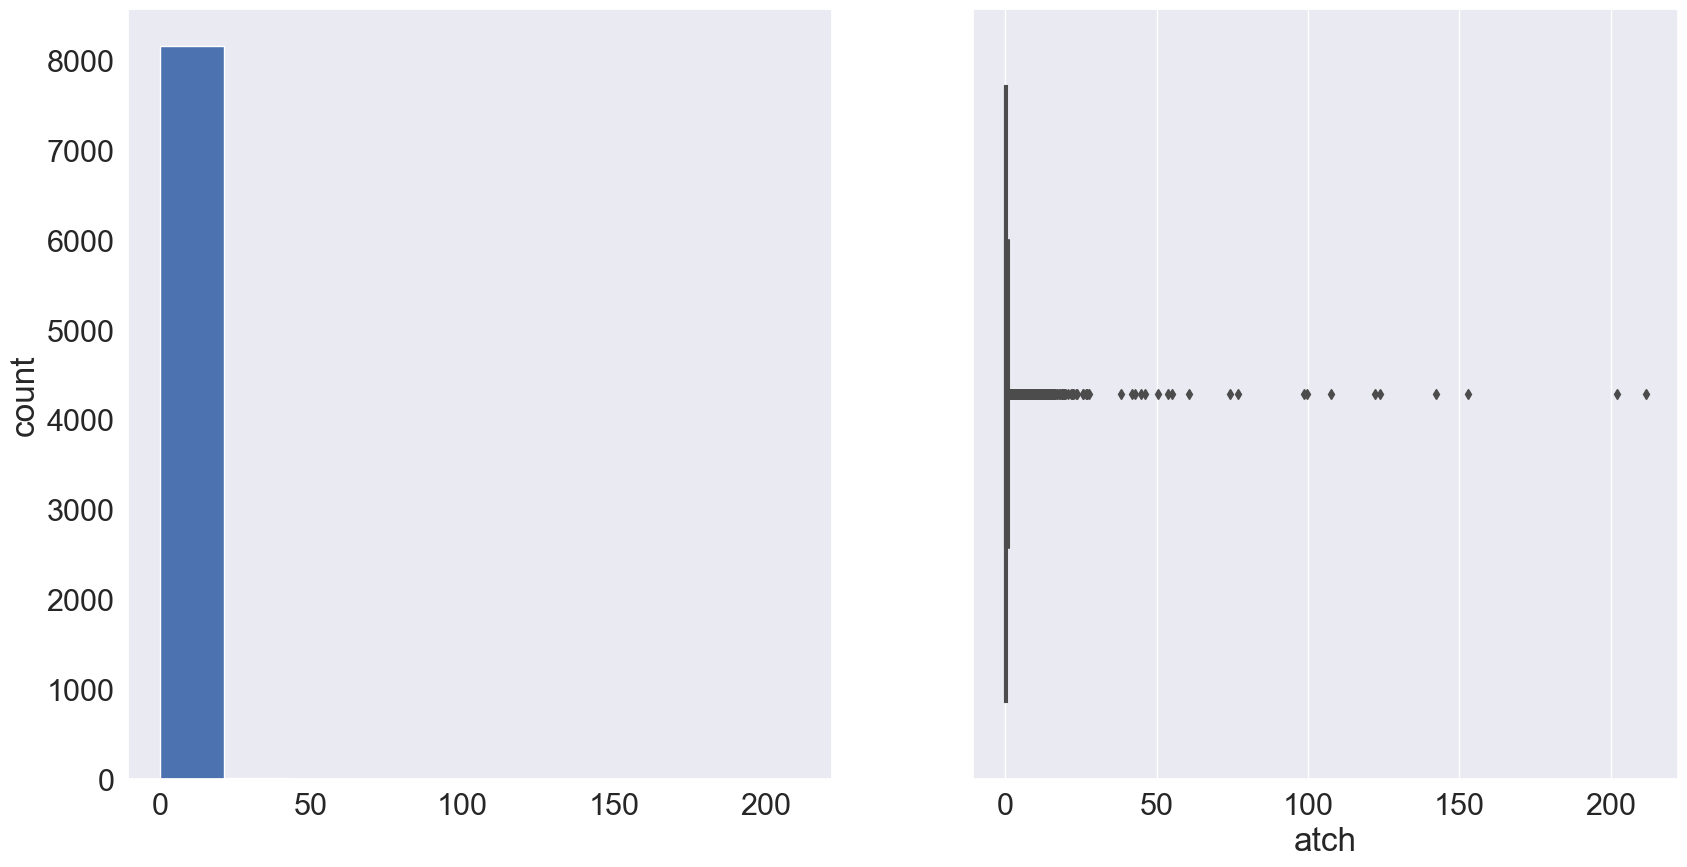

pgin


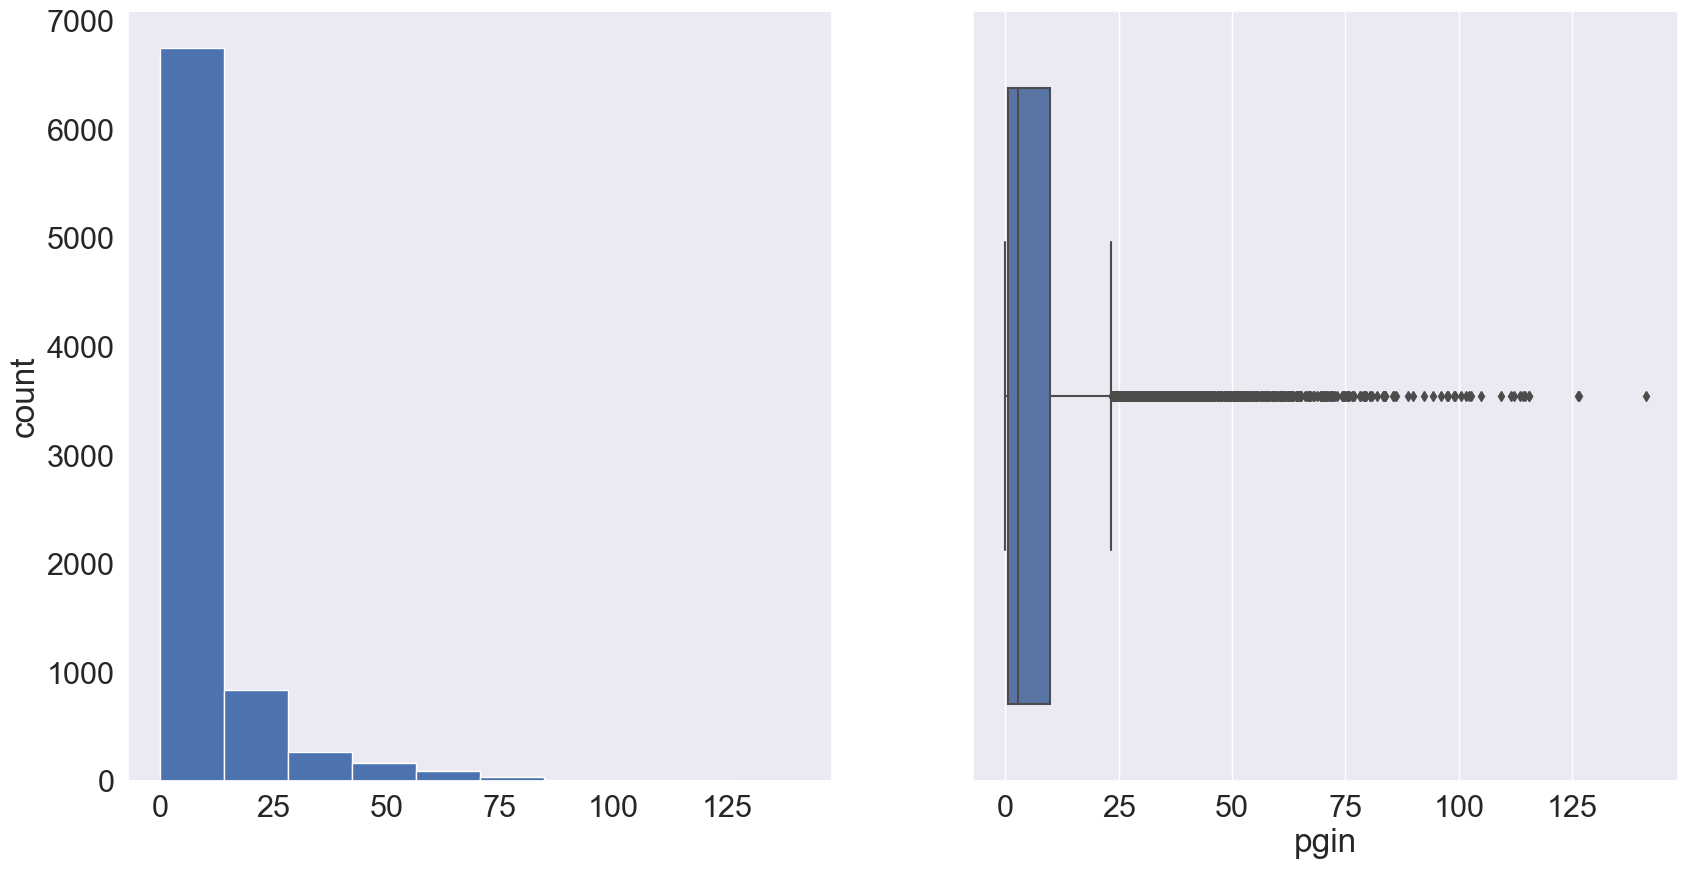

ppgin


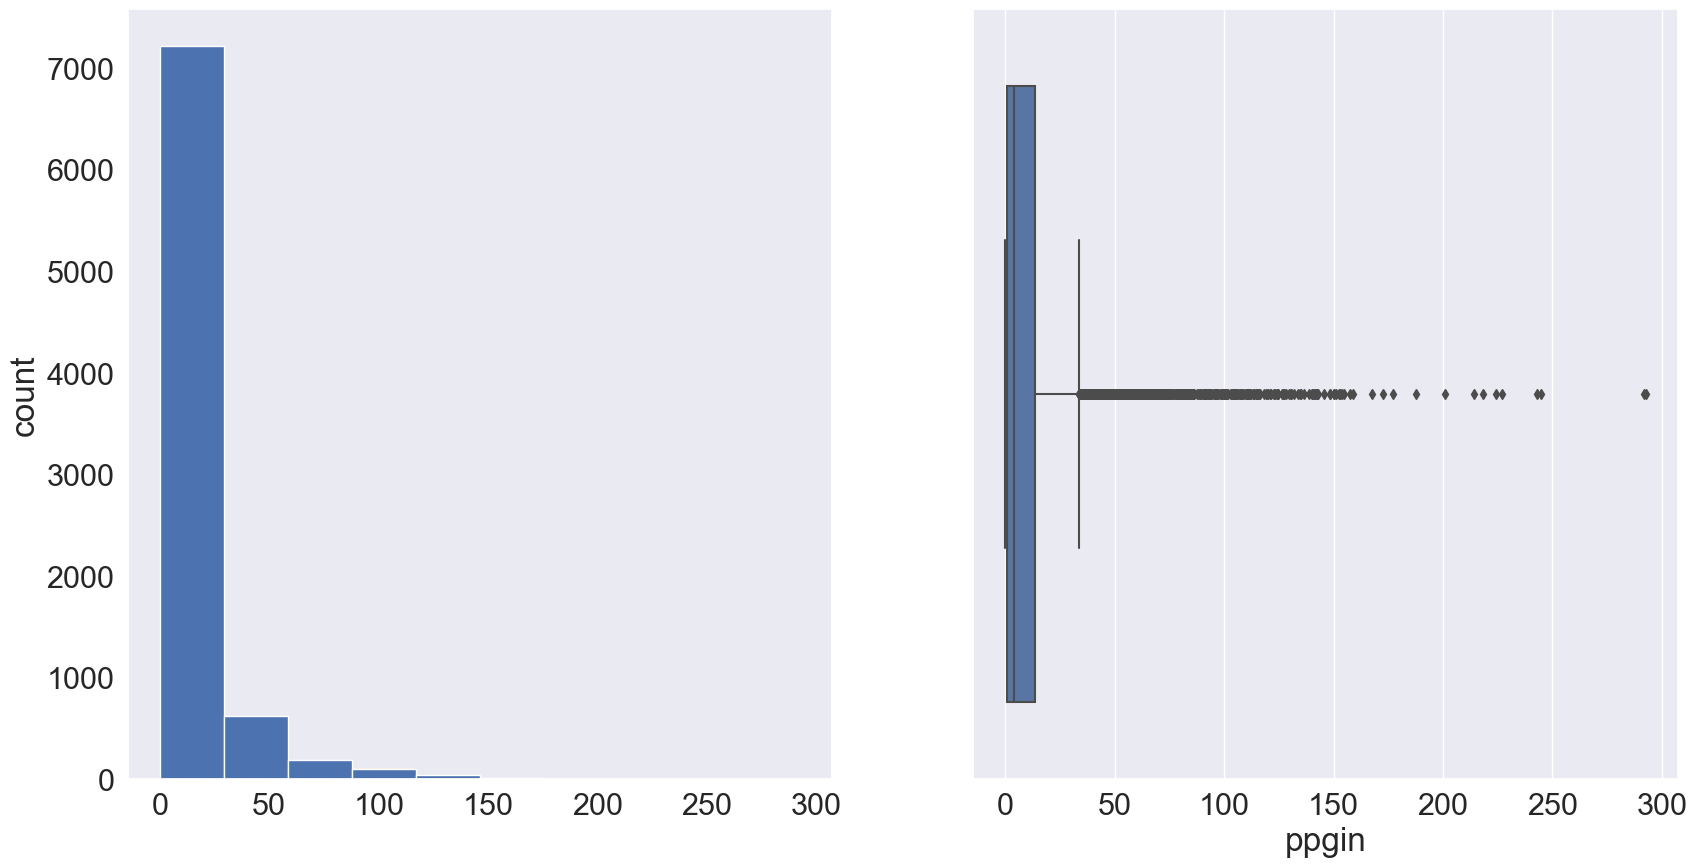

pflt


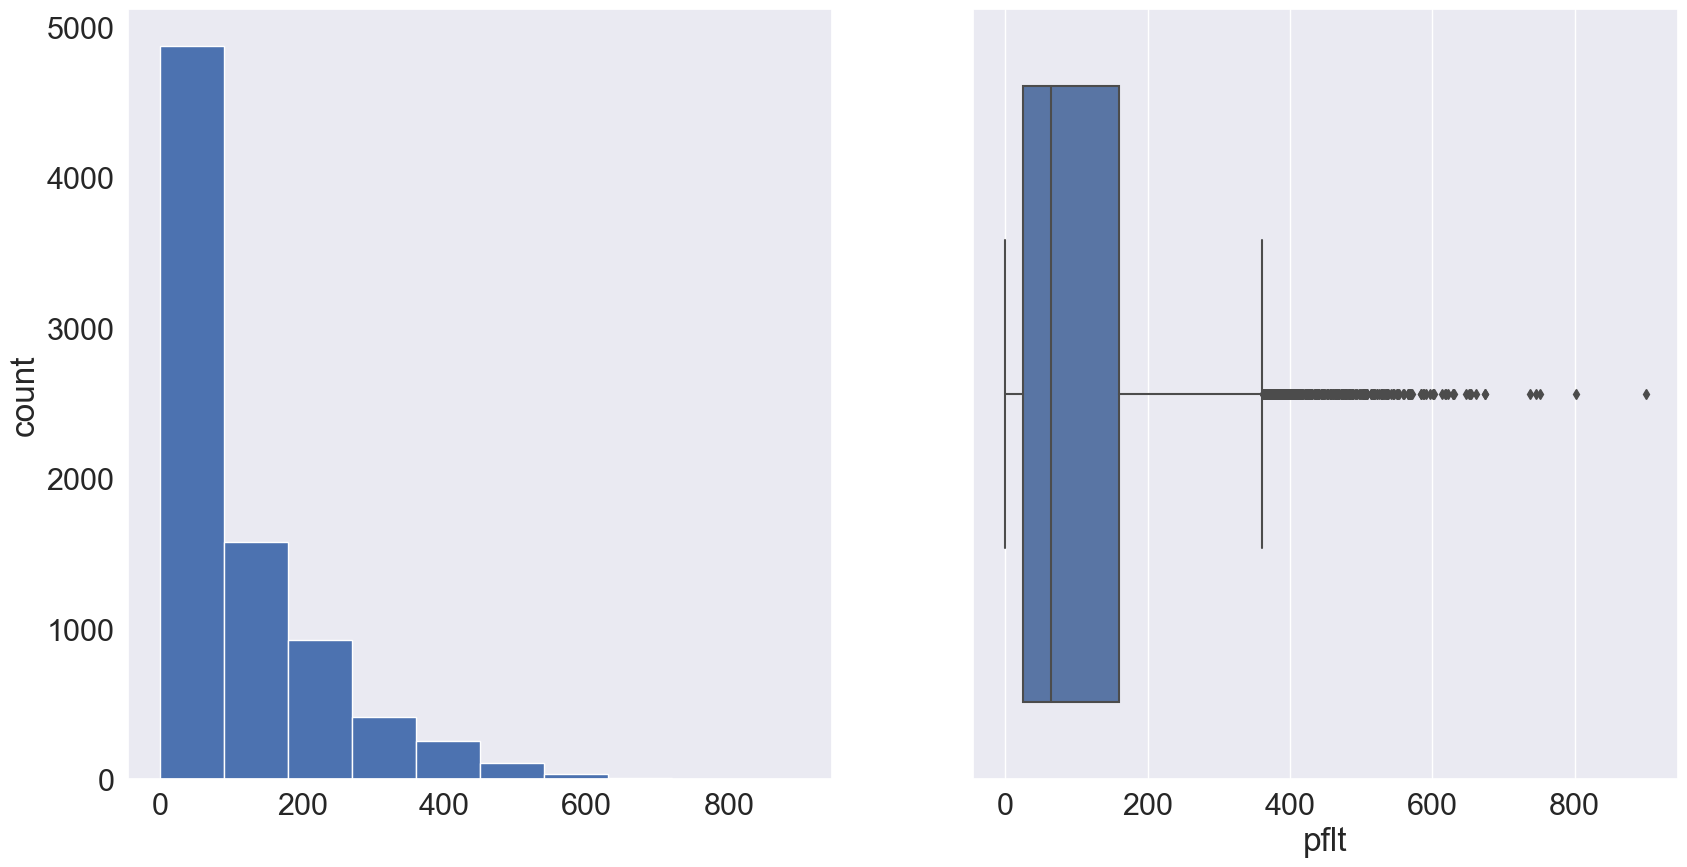

vflt


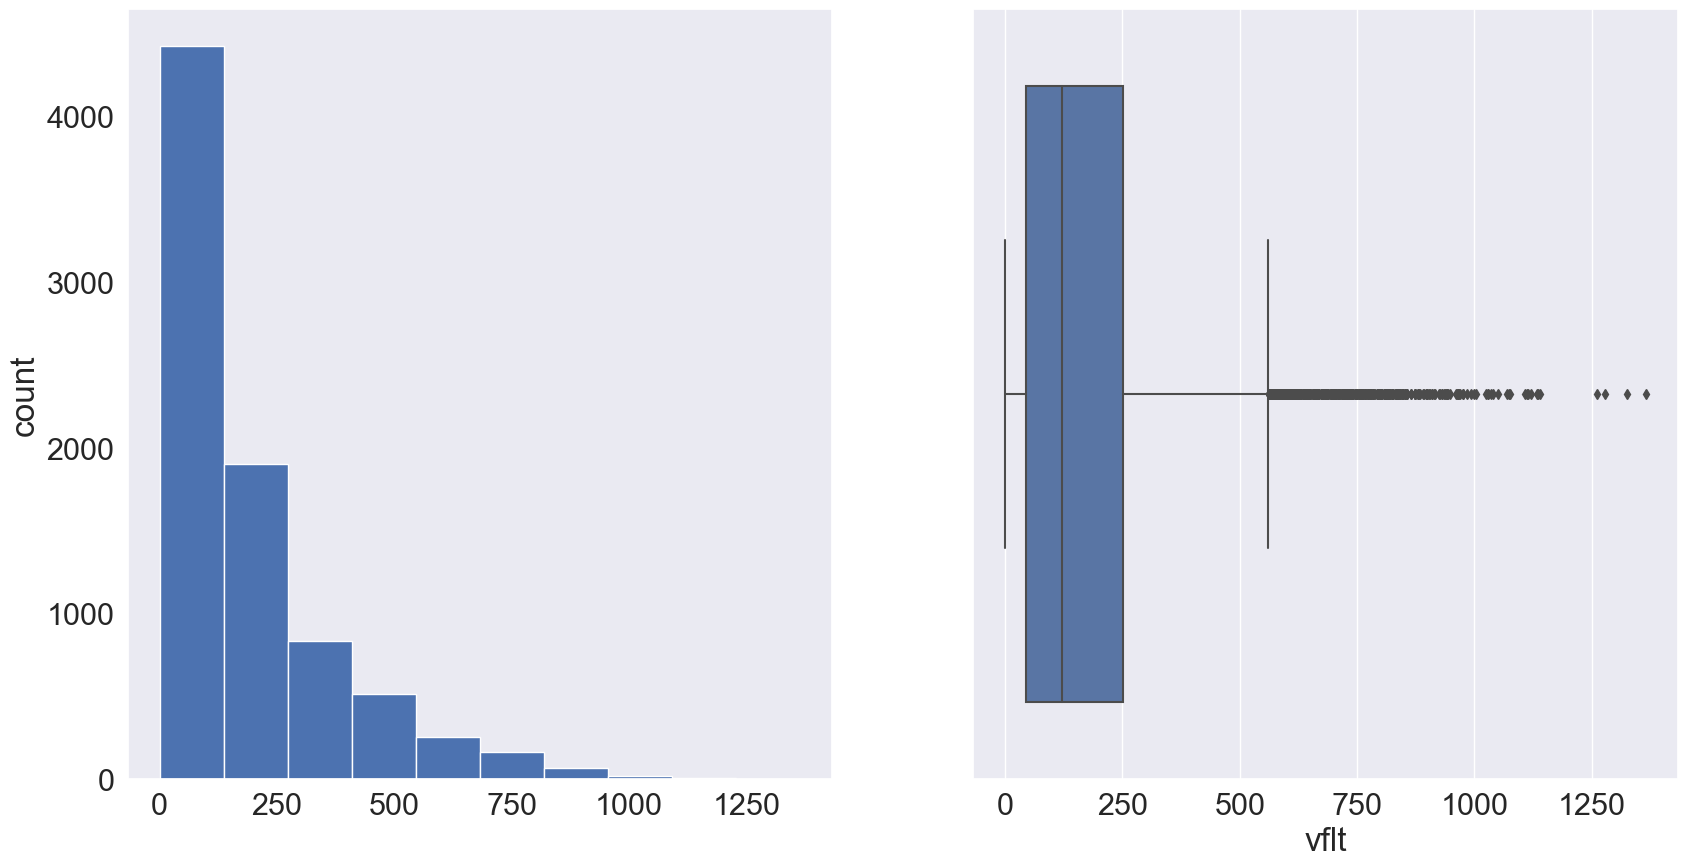

freemem


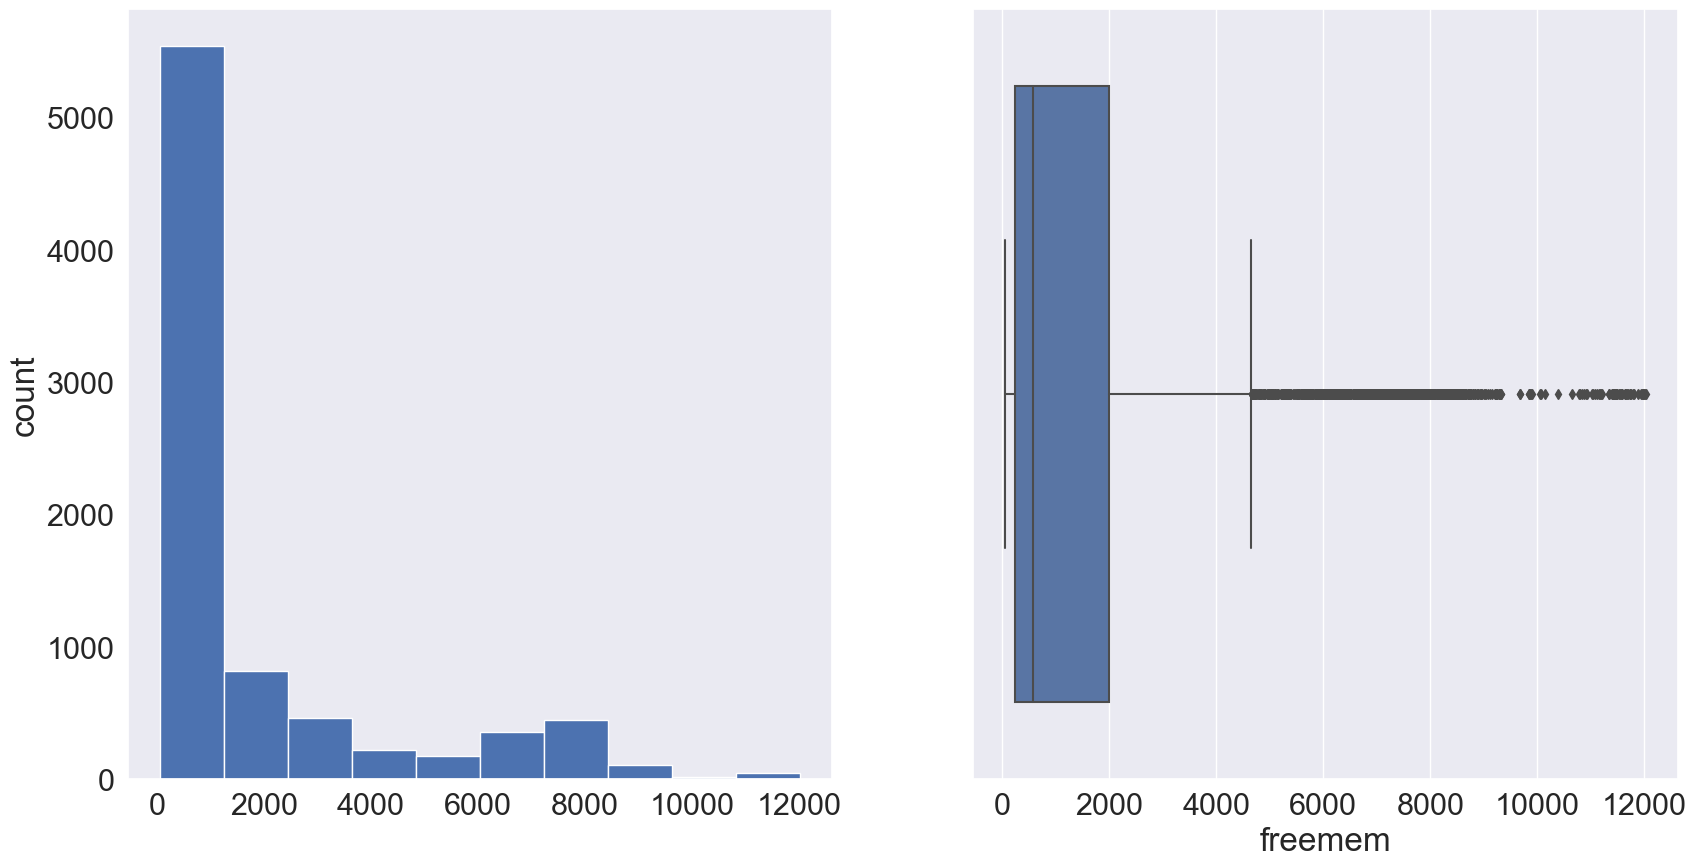

freeswap


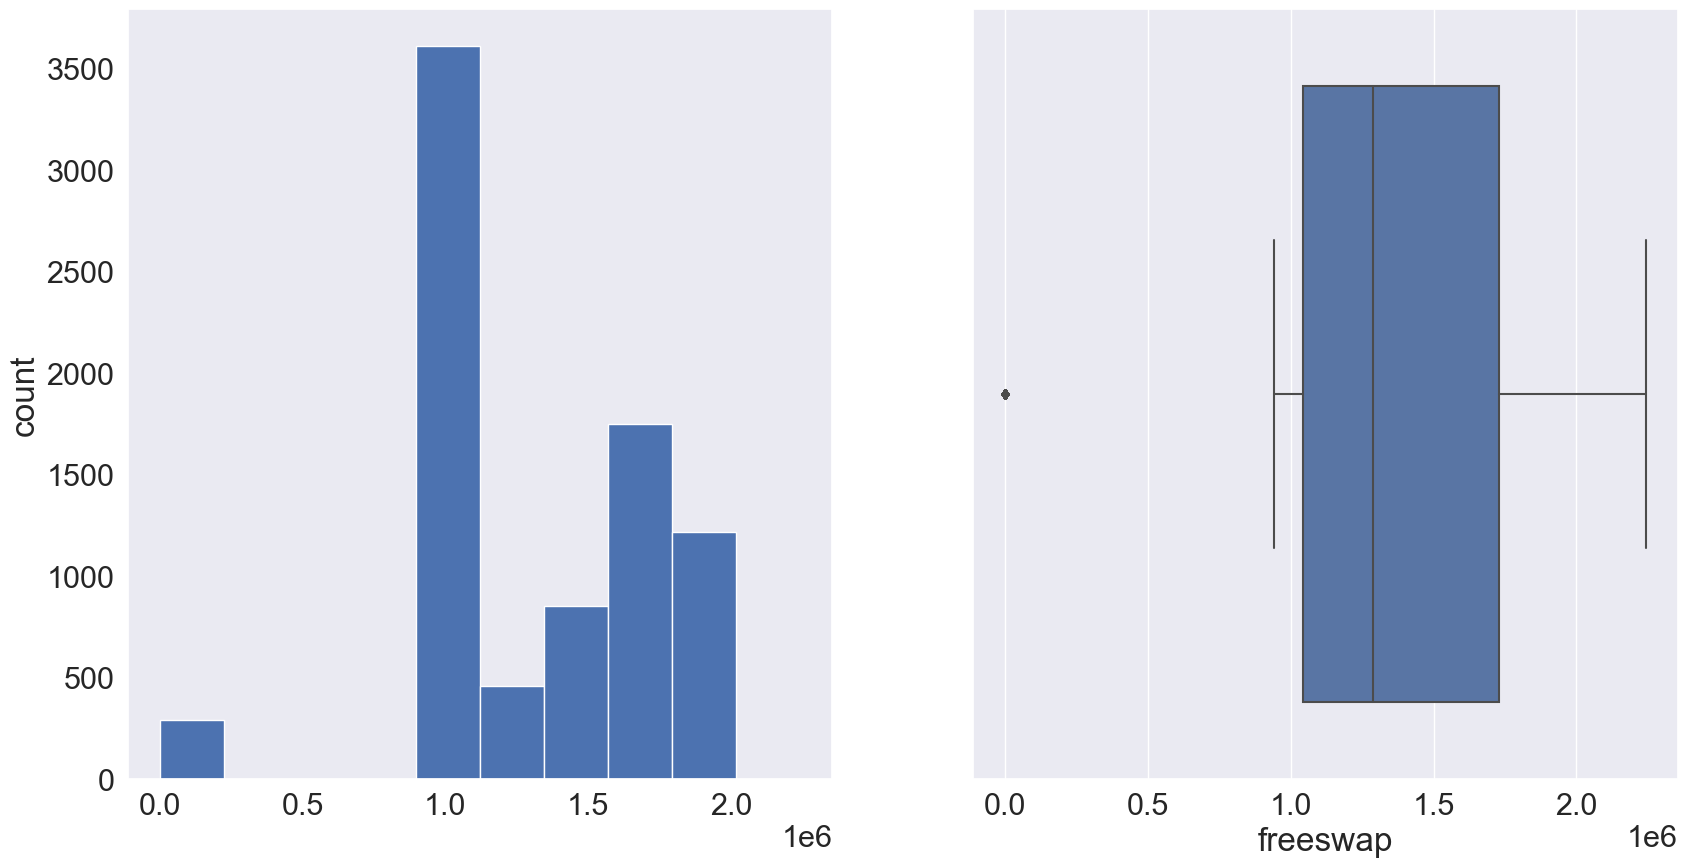

usr


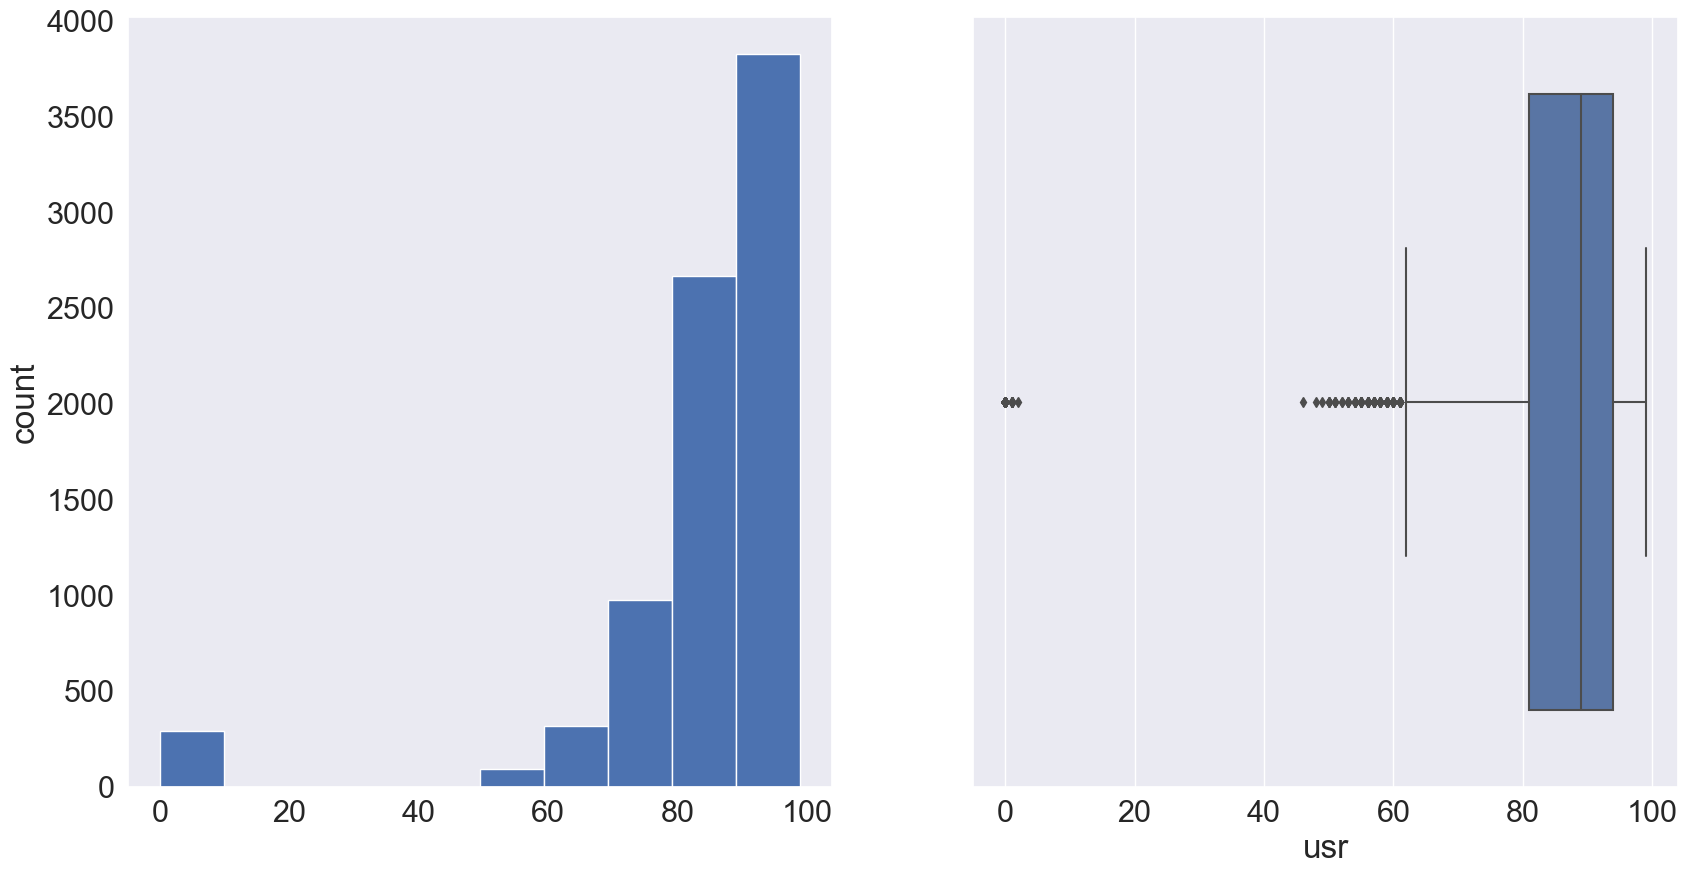

In [95]:
## Plotting histogram without labels

for col in data_new.columns:
    print(col)

    plt.figure(figsize=(20,10))
    plt.subplot(1,2,1)
    data_new[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=data_new[col])
    plt.show()

In [15]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8187    False
8188    False
8189    False
8190    False
8191    False
Length: 8192, dtype: bool

In [16]:
df.duplicated().sum()

0

In [17]:
df['runqsz'].value_counts()

Not_CPU_Bound    4331
CPU_Bound        3861
Name: runqsz, dtype: int64

<Axes: xlabel='runqsz', ylabel='count'>

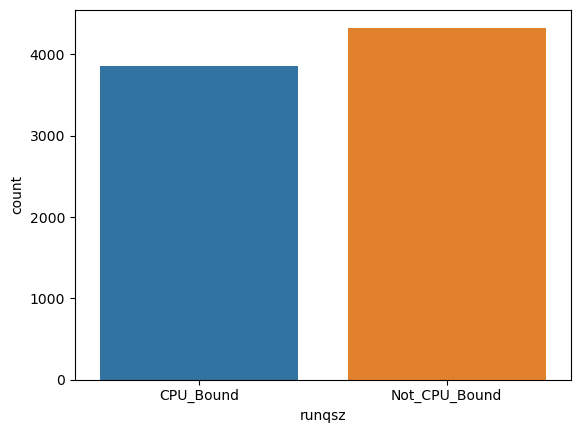

In [18]:
sns.countplot(x='runqsz',data=df)

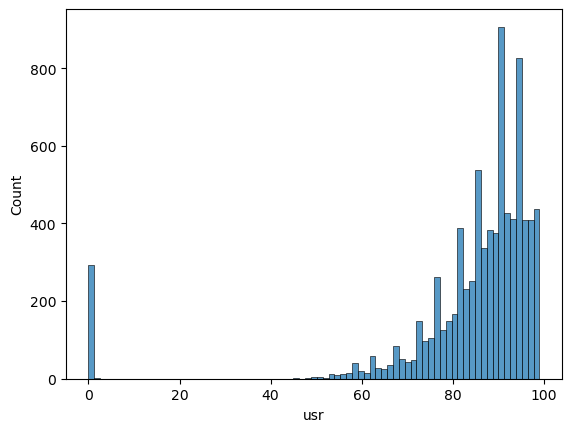

In [19]:
sns.histplot(df['usr'])
plt.show()

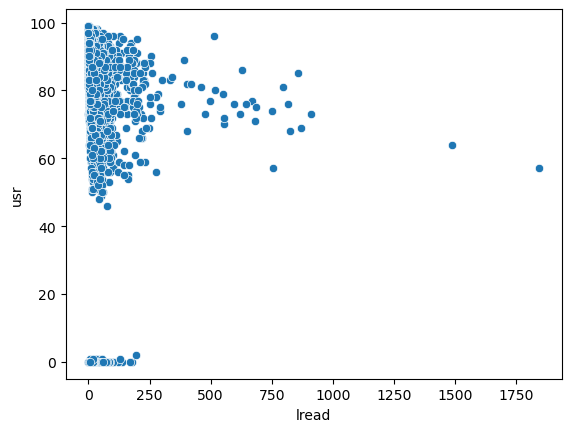

In [20]:
sns.scatterplot(data=df, x='lread', y='usr')
plt.show()

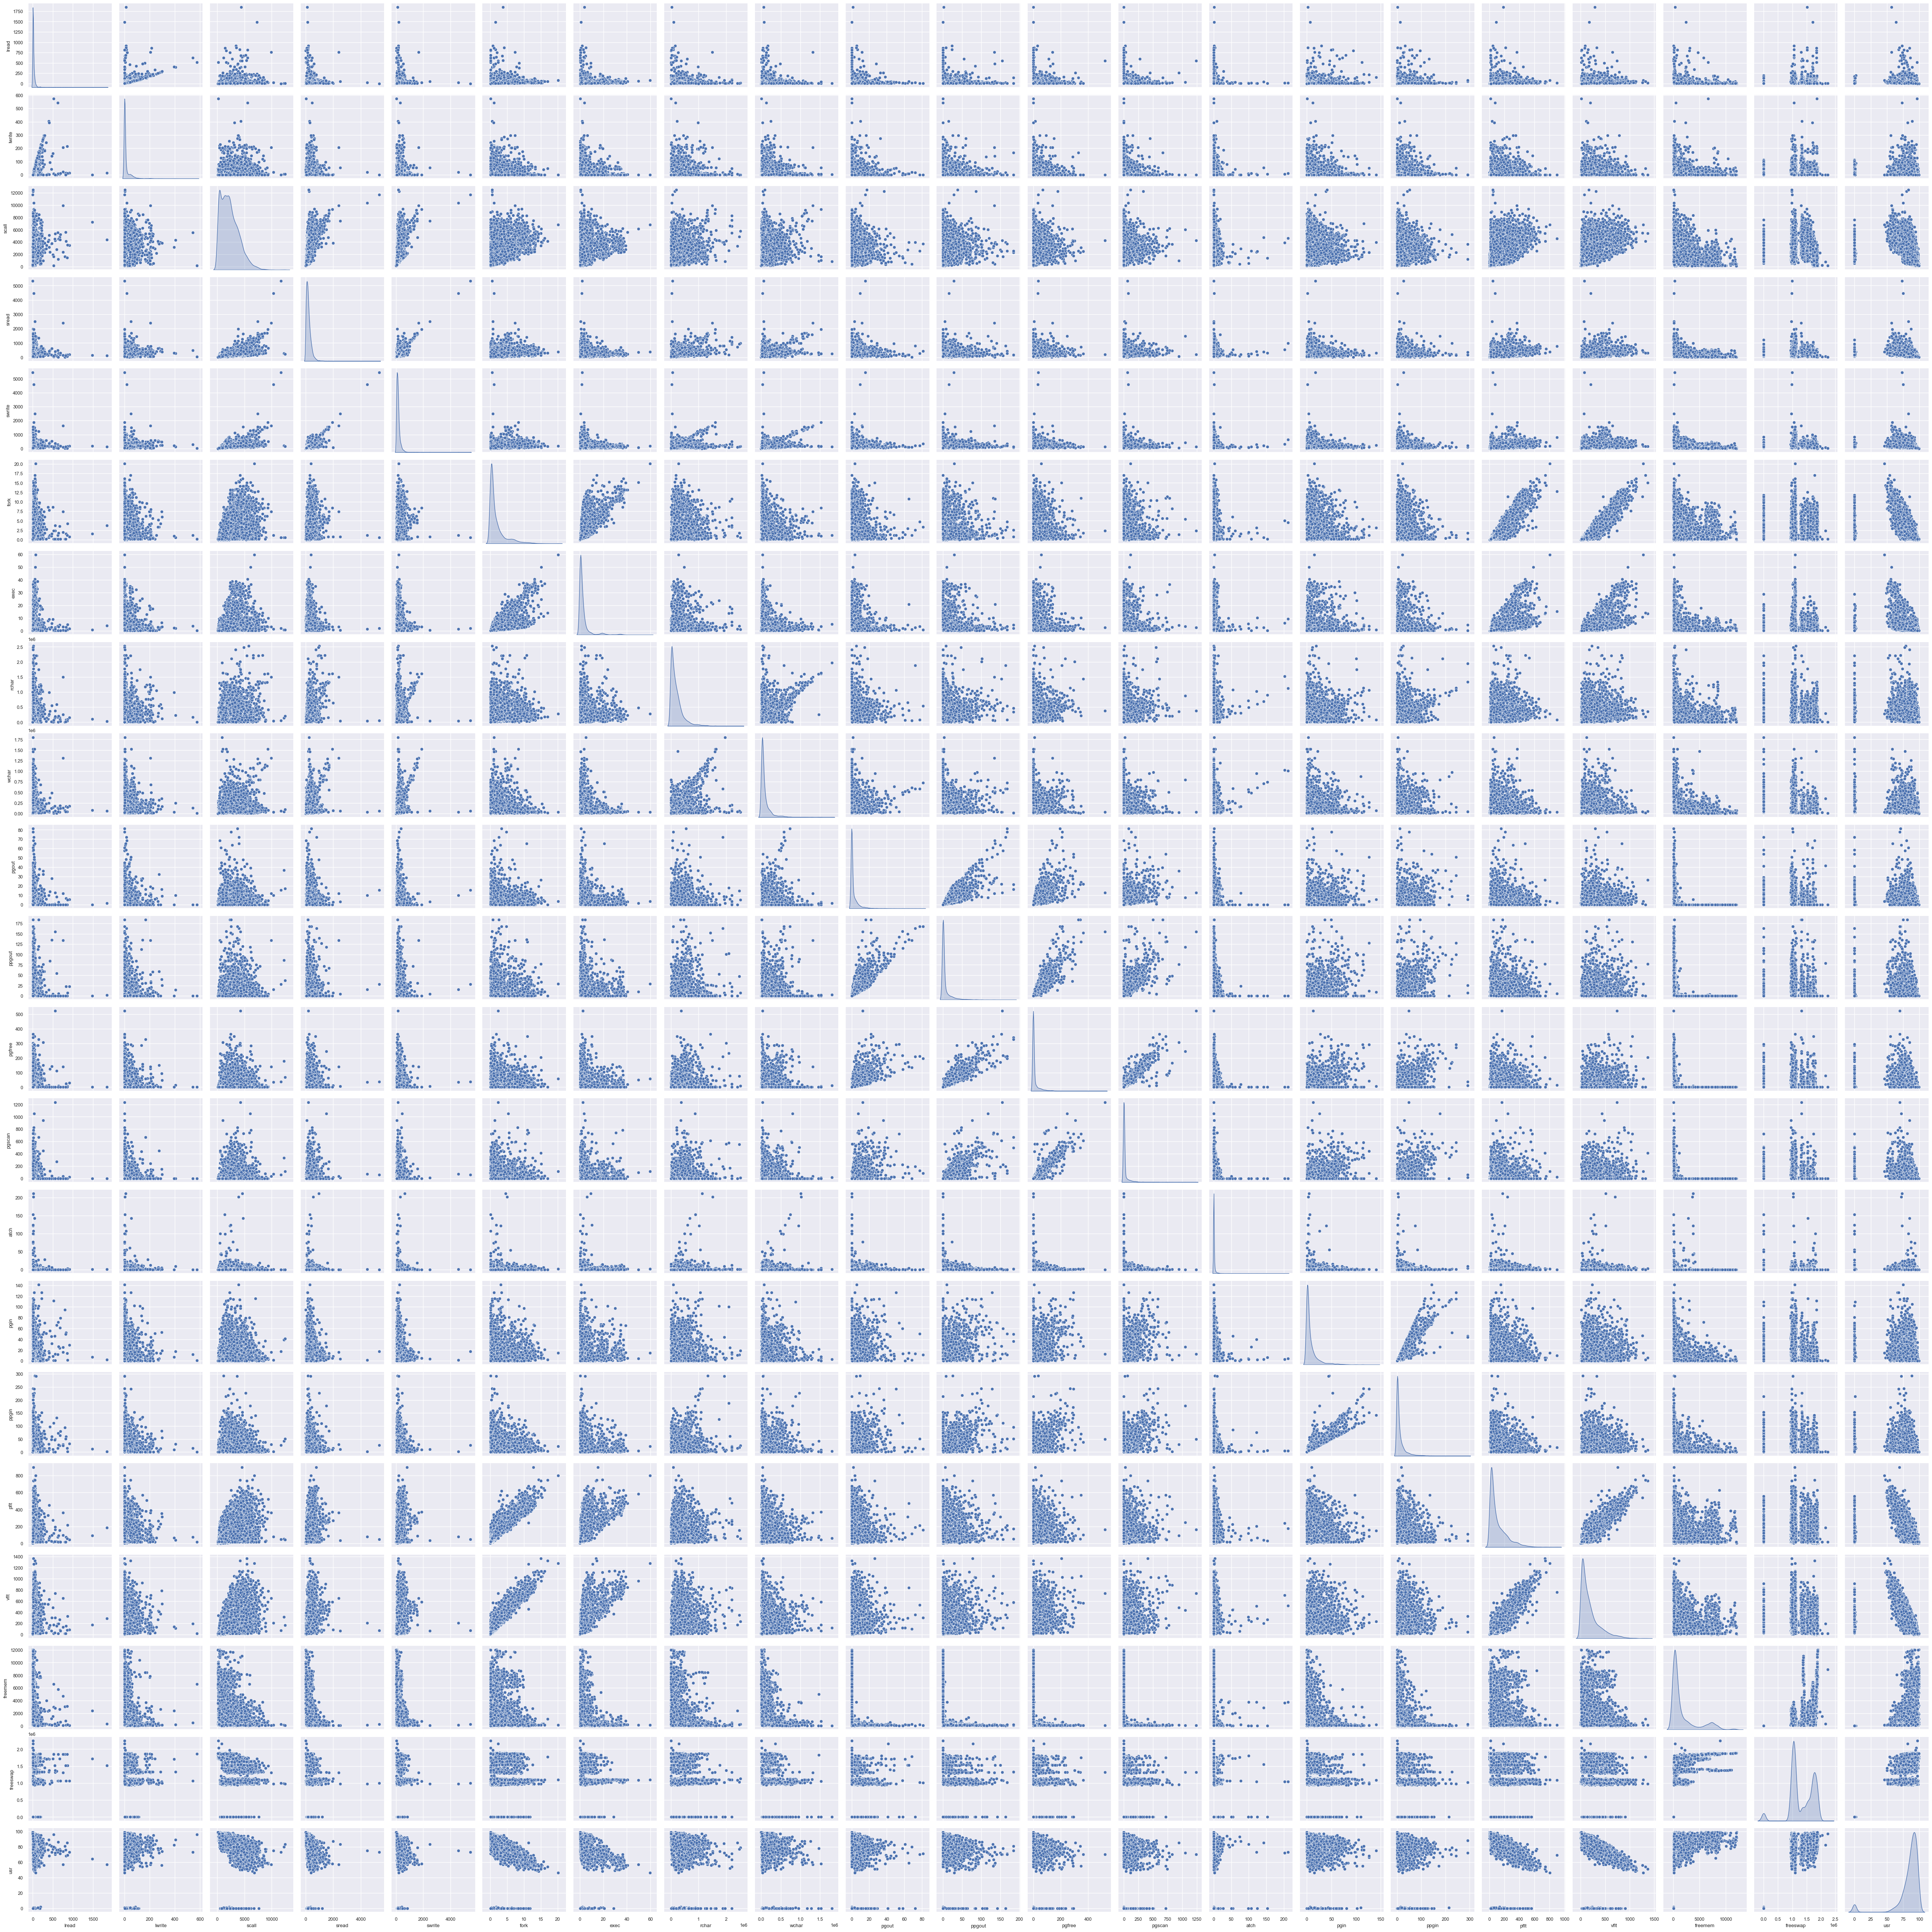

In [22]:
sns.set(font_scale=0.8)
sns.pairplot(data=df,diag_kind='kde');

C:\Users\dell\AppData\Local\Temp\ipykernel_19728\1336988223.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,fmt=".3f");


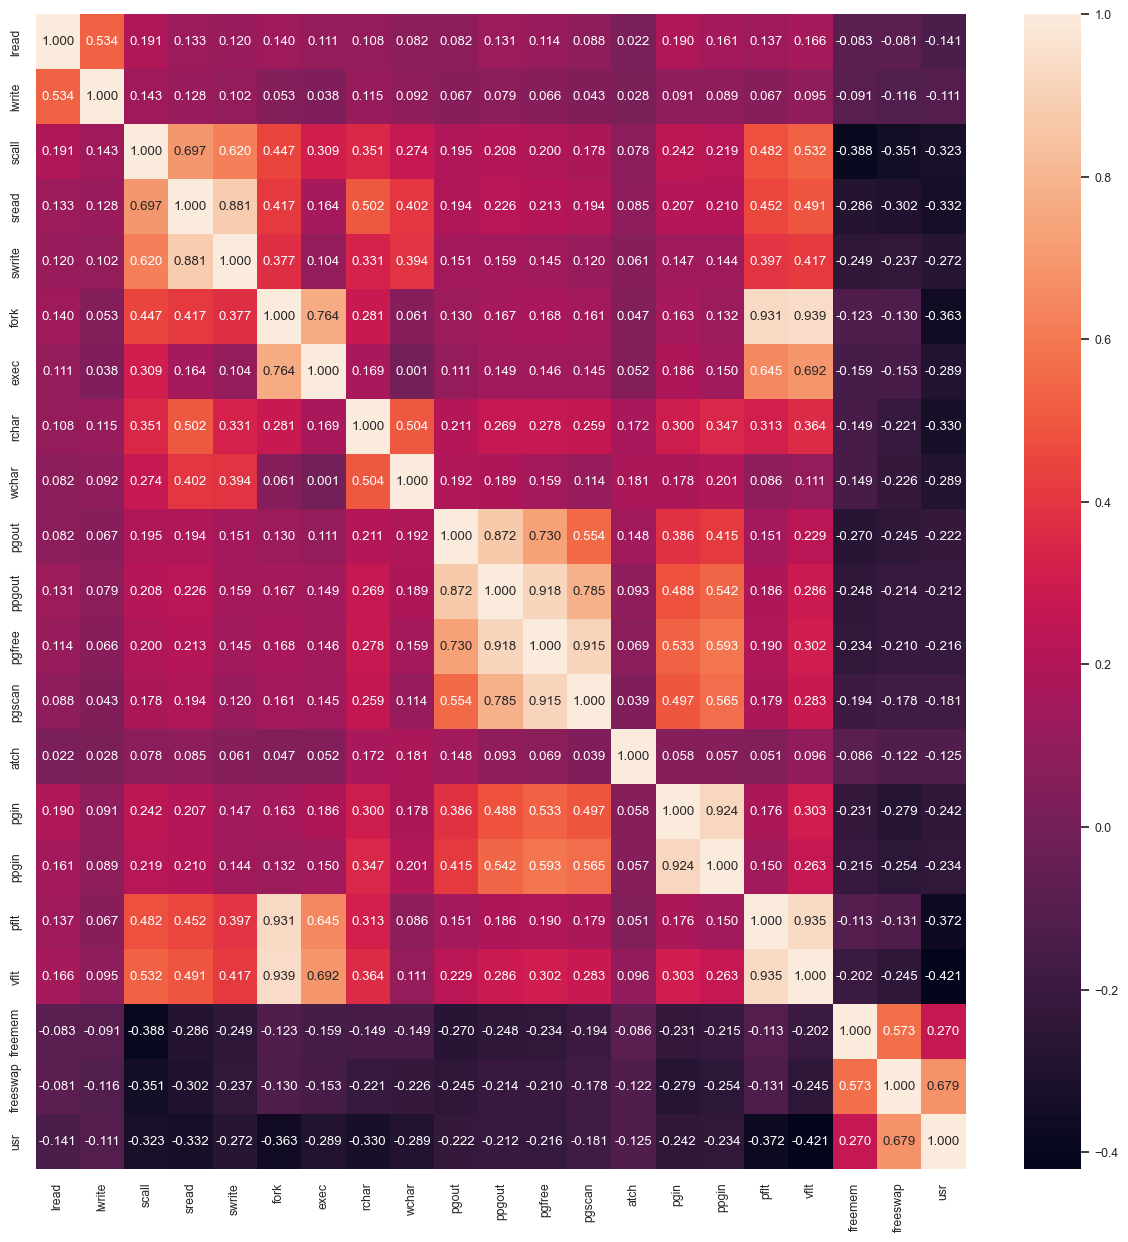

In [23]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,fmt=".3f");

In [24]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 lread         0
lwrite        0
scall         0
sread         0
swrite        0
fork          0
exec          0
rchar       104
wchar        15
pgout         0
ppgout        0
pgfree        0
pgscan        0
atch          0
pgin          0
ppgin         0
pflt          0
vflt          0
runqsz        0
freemem       0
freeswap      0
usr           0
dtype: int64


In [26]:
mean_rchar = df['rchar'].mean()
df['rchar'].fillna(mean_rchar, inplace=True)

In [27]:
mean_wchar = df['wchar'].mean()
df['wchar'].fillna(mean_wchar, inplace=True)

In [28]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 lread       0
lwrite      0
scall       0
sread       0
swrite      0
fork        0
exec        0
rchar       0
wchar       0
pgout       0
ppgout      0
pgfree      0
pgscan      0
atch        0
pgin        0
ppgin       0
pflt        0
vflt        0
runqsz      0
freemem     0
freeswap    0
usr         0
dtype: int64


In [29]:
encoded_data = pd.get_dummies(df, columns=['runqsz'], drop_first=True)

In [30]:
encoded_data

lread  lwrite  scall  sread  swrite  fork  exec          rchar    wchar  \
0         1       0   2147     79      68   0.2  0.20   40671.000000  53995.0   
1         0       0    170     18      21   0.2  0.20     448.000000   8385.0   
2        15       3   2162    159     119   2.0  2.40  197385.728363  31950.0   
3         0       0    160     12      16   0.2  0.20  197385.728363   8670.0   
4         5       1    330     39      38   0.4  0.40  197385.728363  12185.0   
...     ...     ...    ...    ...     ...   ...   ...            ...      ...   
8187     16      12   3009    360     244   1.6  5.81  405250.000000  85282.0   
8188      4       0   1596    170     146   2.4  1.80   89489.000000  41764.0   
8189     16       5   3116    289     190   0.6  0.60  325948.000000  52640.0   
8190     32      45   5180    254     179   1.2  1.20   62571.000000  29505.0   
8191      2       0    985     55      46   1.6  4.80  111111.000000  22256.0   

      pgout  ...  pgscan  atch   pgin  ppgin    pflt    vflt  freemem  \
0      0.00  ...    0.00   0.0   1.60   2.60   16.00   26.40     4670   
1      0.00  ...    0.00   0.0   0.00   0.00   15.63   16.83     7278   
2      0.00  ...    0.00   1.2   6.00   9.40  150.20  220.20      702   
3      0.00  ...    0.00   0.0   0.20   0.20   15.60   16.80     7248   
4      0.00  ...    0.00   0.0   1.00   1.20   37.80   47.60      633   
...     ...  ...     ...   ...    ...    ...     ...     ...      ...   
8187   8.02  ...   55.11   0.6  35.87  47.90  139.28  270.74      387   
8188   3.80  ...    0.20   0.8   3.80   4.40  122.40  212.60      263   
8189   0.40  ...    0.00   0.4  28.40  45.20   60.20  219.80      400   
8190   1.40  ...   18.04   0.4  23.05  24.25   93.19  202.81      141   
8191   0.00  ...    0.00   0.2   3.40   6.20   91.80  110.00      659   

      freeswap  usr  runqsz_Not_CPU_Bound  
0      1730946   95                     0  
1      1869002   97                     1  
2      1021237   87                     1  
3      1863704   98                     1  
4      1760253   90                     1  
...        ...  ...                   ...  
8187    986647   80                     0  
8188   1055742   90                     1  
8189    969106   87                     1  
8190   1022458   83                     0  
8191   1756514   94                     0  

[8192 rows x 22 columns]

In [31]:
encoded_data.columns

Index(['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar',
       'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin',
       'pflt', 'vflt', 'freemem', 'freeswap', 'usr', 'runqsz_Not_CPU_Bound'],
      dtype='object')

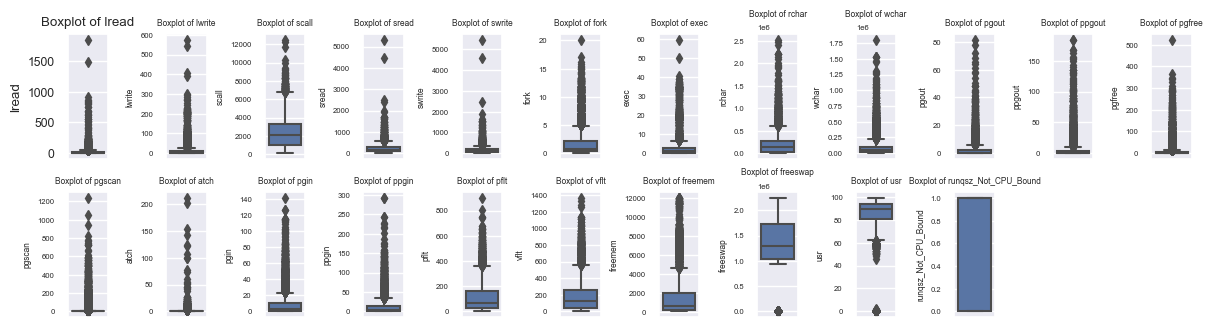

In [32]:
plt.figure(figsize = (12,8))
feature_list = encoded_data.columns
for i in range(len(feature_list)):
    plt.subplot(5, 12, i + 1)
    sns.boxplot(y = encoded_data[feature_list[i]], data = encoded_data)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()
    sns.set(font_scale=0.5);

In [33]:
q1 = encoded_data.quantile(0.25)
q2 = encoded_data.quantile(0.75)

In [34]:
IQR = q2 - q1

In [35]:
max_limit = q2+ (1.5 * IQR)
min_limit = q1 - (1.5 * IQR)

In [36]:
import numpy as np

In [37]:
df_new = pd.DataFrame(np.where(encoded_data > max_limit, max_limit, 
         (np.where(encoded_data < min_limit, min_limit, encoded_data))),columns=['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar',
       'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin',
       'pflt', 'vflt', 'freemem', 'freeswap', 'usr', 'runqsz_Not_CPU_Bound'])

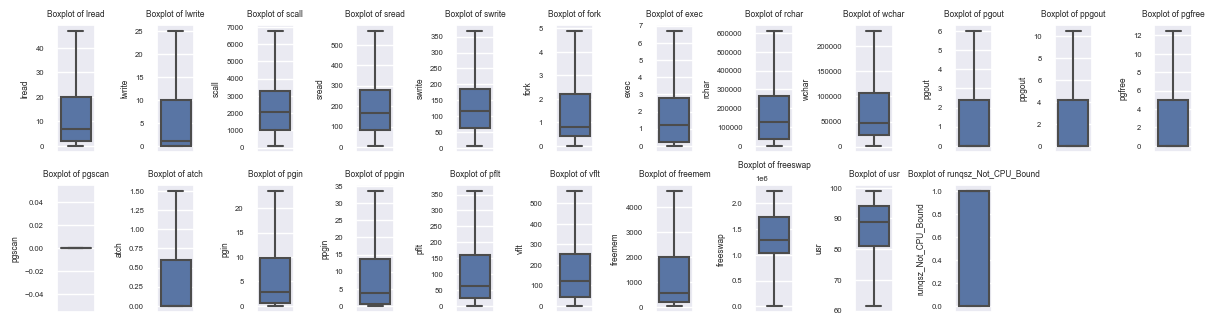

In [38]:
#Check for presence of outliers in each feature
plt.figure(figsize = (12,8))
feature_list = df_new.columns
for i in range(len(feature_list)):
    plt.subplot(5, 12, i + 1)
    sns.boxplot(y = df_new[feature_list[i]], data = df_new)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()
    sns.set(font_scale=0.5);

In [39]:
df_new

lread  lwrite   scall  sread  swrite  fork  exec          rchar  \
0       1.0     0.0  2147.0   79.0    68.0   0.2  0.20   40671.000000   
1       0.0     0.0   170.0   18.0    21.0   0.2  0.20     448.000000   
2      15.0     3.0  2162.0  159.0   119.0   2.0  2.40  197385.728363   
3       0.0     0.0   160.0   12.0    16.0   0.2  0.20  197385.728363   
4       5.0     1.0   330.0   39.0    38.0   0.4  0.40  197385.728363   
...     ...     ...     ...    ...     ...   ...   ...            ...   
8187   16.0    12.0  3009.0  360.0   244.0   1.6  5.81  405250.000000   
8188    4.0     0.0  1596.0  170.0   146.0   2.4  1.80   89489.000000   
8189   16.0     5.0  3116.0  289.0   190.0   0.6  0.60  325948.000000   
8190   32.0    25.0  5180.0  254.0   179.0   1.2  1.20   62571.000000   
8191    2.0     0.0   985.0   55.0    46.0   1.6  4.80  111111.000000   

        wchar  pgout  ...  pgscan  atch     pgin  ppgin    pflt    vflt  \
0     53995.0    0.0  ...     0.0   0.0   1.6000   2.60   16.00   26.40   
1      8385.0    0.0  ...     0.0   0.0   0.0000   0.00   15.63   16.83   
2     31950.0    0.0  ...     0.0   1.2   6.0000   9.40  150.20  220.20   
3      8670.0    0.0  ...     0.0   0.0   0.2000   0.20   15.60   16.80   
4     12185.0    0.0  ...     0.0   0.0   1.0000   1.20   37.80   47.60   
...       ...    ...  ...     ...   ...      ...    ...     ...     ...   
8187  85282.0    6.0  ...     0.0   0.6  23.5125  33.60  139.28  270.74   
8188  41764.0    3.8  ...     0.0   0.8   3.8000   4.40  122.40  212.60   
8189  52640.0    0.4  ...     0.0   0.4  23.5125  33.60   60.20  219.80   
8190  29505.0    1.4  ...     0.0   0.4  23.0500  24.25   93.19  202.81   
8191  22256.0    0.0  ...     0.0   0.2   3.4000   6.20   91.80  110.00   

       freemem   freeswap   usr  runqsz_Not_CPU_Bound  
0     4659.125  1730946.0  95.0                   0.0  
1     4659.125  1869002.0  97.0                   1.0  
2      702.000  1021237.0  87.0                   1.0  
3     4659.125  1863704.0  98.0                   1.0  
4      633.000  1760253.0  90.0                   1.0  
...        ...        ...   ...                   ...  
8187   387.000   986647.0  80.0                   0.0  
8188   263.000  1055742.0  90.0                   1.0  
8189   400.000   969106.0  87.0                   1.0  
8190   141.000  1022458.0  83.0                   0.0  
8191   659.000  1756514.0  94.0                   0.0  

[8192 rows x 22 columns]

In [40]:
df_new.isnull().sum()

lread                   0
lwrite                  0
scall                   0
sread                   0
swrite                  0
fork                    0
exec                    0
rchar                   0
wchar                   0
pgout                   0
ppgout                  0
pgfree                  0
pgscan                  0
atch                    0
pgin                    0
ppgin                   0
pflt                    0
vflt                    0
freemem                 0
freeswap                0
usr                     0
runqsz_Not_CPU_Bound    0
dtype: int64

In [41]:
df_new.duplicated().sum()

0

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X = df_new.drop('usr', axis=1)
y = df_new['usr']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [48]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [49]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [97]:
model = LinearRegression()
model.fit(X_train, y_train)

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name,model.coef_[idx]))

The coefficient for lread is -0.06340997319284218
The coefficient for lwrite is 0.04801838613978275
The coefficient for scall is -0.0006643523374678529
The coefficient for sread is 0.00033858757891119703
The coefficient for swrite is -0.005459881814296951
The coefficient for fork is 0.02963299570699373
The coefficient for exec is -0.3210632504852745
The coefficient for rchar is -5.211879156061244e-06
The coefficient for wchar is -5.3463354553941764e-06
The coefficient for pgout is -0.36685229813600284
The coefficient for ppgout is -0.07860920074541394
The coefficient for pgfree is 0.08525820125754315
The coefficient for pgscan is 3.3306690738754696e-16
The coefficient for atch is 0.63043803512419
The coefficient for pgin is 0.019753855912779106
The coefficient for ppgin is -0.06715372112652186
The coefficient for pflt is -0.033591989662578266
The coefficient for vflt is -0.0054649217515184865
The coefficient for freemem is -0.0004576614008080029
The coefficient for freeswap is 8.829320

In [98]:
#intercept value
model.intercept_ 

84.13143842096282

In [50]:
X_train_sm = sm.add_constant(X_train)  # Add constant term for statsmodels
model_sm = sm.OLS(y_train, X_train_sm).fit()
print(model_sm.summary())


                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1116.
Date:                Sun, 05 Nov 2023   Prob (F-statistic):               0.00
Time:                        21:18:27   Log-Likelihood:                -16656.
No. Observations:                5734   AIC:                         3.335e+04
Df Residuals:                    5713   BIC:                         3.349e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   84.1314 

In [51]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

lread                    9.504596
lwrite                   6.548395
scall                    8.826526
sread                   18.169718
swrite                  16.767689
fork                    25.002523
exec                     6.092313
rchar                    4.361875
wchar                    3.344787
pgout                   16.004026
ppgout                  40.799885
pgfree                  22.974096
pgscan                        NaN
atch                     2.736070
pgin                    23.072561
ppgin                   23.162737
pflt                    24.685476
vflt                    33.872228
freemem                  3.406754
freeswap                 7.114274
runqsz_Not_CPU_Bound     2.155858
dtype: float64



D:\py\lib\site-packages\statsmodels\regression\linear_model.py:1754: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


In [52]:
from sklearn.metrics import r2_score, mean_squared_error

In [53]:
y_train_pred = model.predict(X_train)

In [54]:
# Calculate R-squared and RMSE on training set
r2_train = r2_score(y_train, y_train_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)


In [55]:
# Make predictions on the test set
y_test_pred = model.predict(X_test)

In [56]:
# Calculate R-squared and RMSE on test set
r2_test = r2_score(y_test, y_test_pred)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)


In [57]:
print("Training Set:")
print("R-squared:", r2_train)
print("RMSE:", rmse_train)


Training Set:
R-squared: 0.7961565330395104
RMSE: 4.4190166755430935


In [58]:
print("\nTest Set:")
print("R-squared:", r2_test)
print("RMSE:", rmse_test)



Test Set:
R-squared: 0.7676695029858749
RMSE: 4.652920160995563


In [59]:
# Analyze the coefficients of significant variables
coefficients = pd.DataFrame({'Variable': X_train.columns, 'Coefficient': model.coef_})
significant_variables = coefficients[coefficients['Coefficient'] != 0]

In [60]:
coefficients

Variable   Coefficient
0                  lread -6.340997e-02
1                 lwrite  4.801839e-02
2                  scall -6.643523e-04
3                  sread  3.385876e-04
4                 swrite -5.459882e-03
5                   fork  2.963300e-02
6                   exec -3.210633e-01
7                  rchar -5.211879e-06
8                  wchar -5.346335e-06
9                  pgout -3.668523e-01
10                ppgout -7.860920e-02
11                pgfree  8.525820e-02
12                pgscan  3.330669e-16
13                  atch  6.304380e-01
14                  pgin  1.975386e-02
15                 ppgin -6.715372e-02
16                  pflt -3.359199e-02
17                  vflt -5.464922e-03
18               freemem -4.576614e-04
19              freeswap  8.829320e-06
20  runqsz_Not_CPU_Bound  1.613737e+00

In [61]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [62]:
import statsmodels.formula.api as sm

In [63]:
#RMSE on Training data

predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

4.4190166755430935

In [64]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

4.652920160995563

In [65]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression

In [67]:
lr = LinearRegression()

In [68]:
lr.fit(X_train,y_train)

LinearRegression()

In [70]:
y_pred = lr.predict(X_test)

In [71]:
print("MSE",mean_squared_error(y_test,y_pred))

MSE 21.649666024598975


In [72]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 3.3811292739044787


In [74]:
y_pred = lr.predict(X_train)

In [75]:
print("MAE",mean_absolute_error(y_train,y_pred))

MAE 3.2853840717710296


In [76]:
print("MSE",mean_squared_error(y_train,y_pred))

MSE 19.527708378727937


In [77]:
import statsmodels.api as sm

In [78]:
olsmod = sm.OLS(y_train, X_train_sm)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1116.
Date:                Sun, 05 Nov 2023   Prob (F-statistic):               0.00
Time:                        21:19:26   Log-Likelihood:                -16656.
No. Observations:                5734   AIC:                         3.335e+04
Df Residuals:                    5713   BIC:                         3.349e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   84.1314 

In [79]:
# Let us write the equation of linear regression
Equation = "usr ="
print(Equation, end=" ")
for i in range(len(X_train.columns)):
    if i == 0:
        print(olsres.params[i], "+", end=" ")
    elif i != len(X_train.columns) - 1:
        print(
            olsres.params[i],
            "* (",
            X_train.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print(olsres.params[i], "* (", X_train.columns[i], ")")

usr = 84.13143842096878 + -0.06340997319296322 * ( lwrite ) +  0.0480183861397501 * ( scall ) +  -0.0006643523374678949 * ( sread ) +  0.00033858757892168707 * ( swrite ) +  -0.005459881814295867 * ( fork ) +  0.029632995707531862 * ( exec ) +  -0.3210632504852813 * ( rchar ) +  -5.2118791560858775e-06 * ( wchar ) +  -5.346335455392169e-06 * ( pgout ) +  -0.3668522981359781 * ( ppgout ) +  -0.07860920074539046 * ( pgfree ) +  0.08525820125757716 * ( pgscan ) +  -5.224039382141837e-14 * ( atch ) +  0.6304380351240257 * ( pgin ) +  0.019753855912753526 * ( ppgin ) +  -0.06715372112653131 * ( pflt ) +  -0.03359198966257745 * ( vflt ) +  -0.005464921751521691 * ( freemem ) +  -0.00045766140080710397 * ( freeswap ) +  8.829320420399997e-06 * ( runqsz_Not_CPU_Bound )


In [80]:
X_train1 = X_train.drop(["sread"], axis=1)
olsmod = sm.OLS(y_train, X_train1)
olsres = olsmod.fit()
print(olsres.summary())

                                 OLS Regression Results                                
Dep. Variable:                    usr   R-squared (uncentered):                   0.965
Model:                            OLS   Adj. R-squared (uncentered):              0.965
Method:                 Least Squares   F-statistic:                              8362.
Date:                Sun, 05 Nov 2023   Prob (F-statistic):                        0.00
Time:                        21:19:32   Log-Likelihood:                         -24100.
No. Observations:                5734   AIC:                                  4.824e+04
Df Residuals:                    5715   BIC:                                  4.837e+04
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [81]:
X_train2 = X_train.drop(["lread"], axis=1)
olsmod = sm.OLS(y_train, X_train1)
olsres_1 = olsmod.fit()
print(olsres_1.summary())

                                 OLS Regression Results                                
Dep. Variable:                    usr   R-squared (uncentered):                   0.965
Model:                            OLS   Adj. R-squared (uncentered):              0.965
Method:                 Least Squares   F-statistic:                              8362.
Date:                Sun, 05 Nov 2023   Prob (F-statistic):                        0.00
Time:                        21:19:37   Log-Likelihood:                         -24100.
No. Observations:                5734   AIC:                                  4.824e+04
Df Residuals:                    5715   BIC:                                  4.837e+04
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [82]:
X_train2 = X_train.drop(["pgscan"], axis=1)
olsmod = sm.OLS(y_train, X_train2)
olsres_2 = olsmod.fit()
print(olsres_2.summary())

                                 OLS Regression Results                                
Dep. Variable:                    usr   R-squared (uncentered):                   0.965
Model:                            OLS   Adj. R-squared (uncentered):              0.965
Method:                 Least Squares   F-statistic:                              7955.
Date:                Sun, 05 Nov 2023   Prob (F-statistic):                        0.00
Time:                        21:19:40   Log-Likelihood:                         -24096.
No. Observations:                5734   AIC:                                  4.823e+04
Df Residuals:                    5714   BIC:                                  4.837e+04
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [83]:
from sklearn.linear_model import LinearRegression

In [84]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [85]:
regressor.fit(X_train, y_train)

LinearRegression()

In [86]:
y_pred = regressor.predict(X_test)

In [87]:
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

      Actual  Predicted
3894    95.0  96.919640
4276    95.0  90.353086
3414    61.5  77.883855
4165    80.0  77.981118
7385    79.0  77.849229
...      ...        ...
4744    89.0  98.357204
6918    85.0  81.226265
1556    91.0  97.585430
1577    94.0  90.923320
453     81.0  79.453566

[2458 rows x 2 columns]


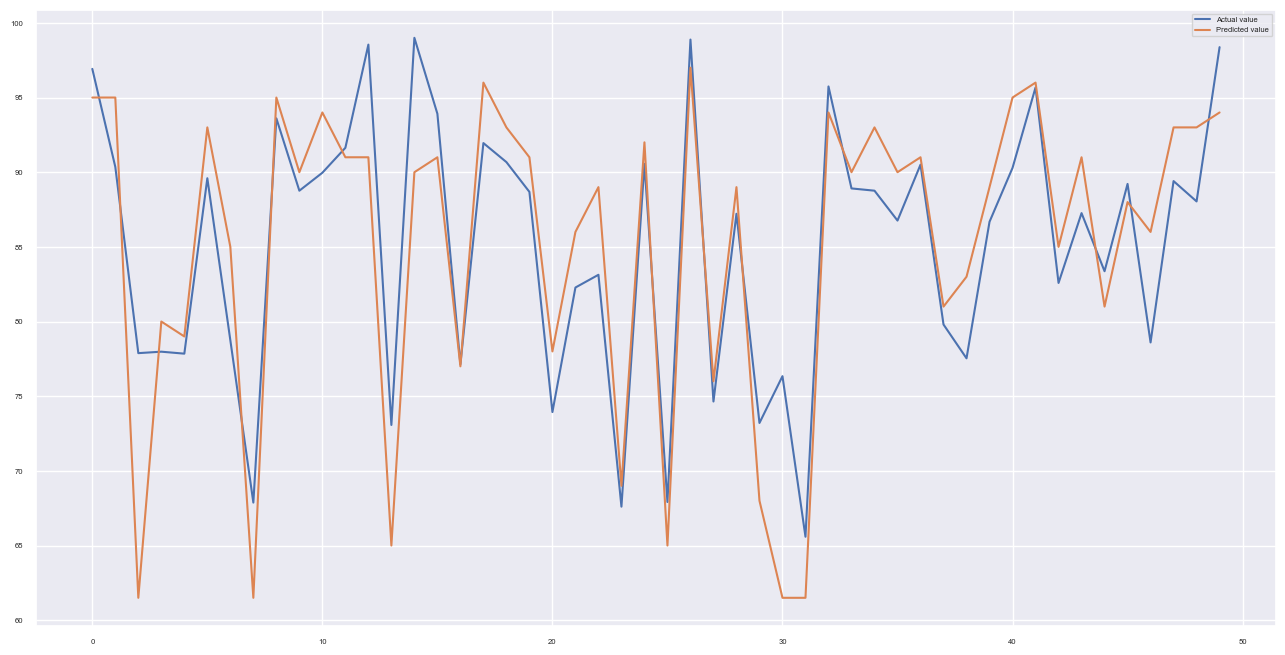

In [88]:
test = pd.DataFrame({'Predicted value':y_pred, 'Actual value':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual value','Predicted value'])

In [89]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [90]:
y_pred_sk = lin_reg.predict(X_test)

In [91]:
import matplotlib.pyplot as plt

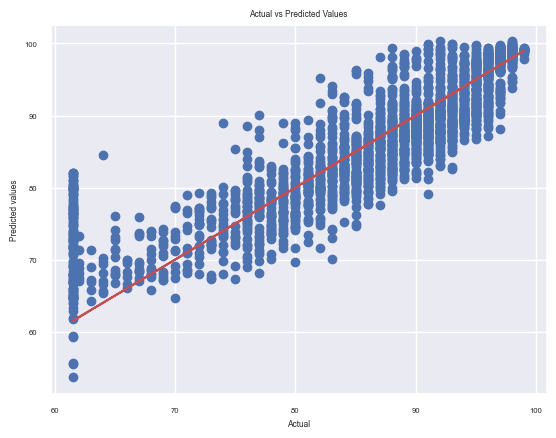

<Figure size 5000x5000 with 0 Axes>

In [92]:
lm=LinearRegression()
lm.fit(X_train,y_train)
pred_lm = lm.predict(X_test)

# Our predictions
plt.scatter(y_test,pred_lm)

# Perfect predictions
plt.plot(y_test,y_test,'r');
plt.xlabel('Actual')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted Values')
plt.figure(figsize = (50,50))
sns.set(font_scale=2);